# Problem Statement 

The data given is about `House Prices` and the mission is, to predict the prices 

In this project we want to have a better understanding for the housing features.

We have two datasets, which are train dataset and test dataset.

Data Sources:
[Train & Test](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### Kaggle Link 
[Housing Project](https://www.kaggle.com/oalharb0/house-pricing-project?scriptVersionId=22934561)

### Kaggel Score
> 0.162

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
sns.set(rc={'figure.figsize':(15,8)},style='whitegrid')


In [2]:
# settings

# pd.set_option('display.max_rows', 1500)
# pd.set_option('display.max_columns', 1000)
# pd.reset_option('all')

In [3]:
# loading train and test data 
housing_train = pd.read_csv('../DATA/train.csv')
housing_test = pd.read_csv('../DATA/test.csv')

# combine the two datasets
housing = housing_train.append(housing_test,sort=False,ignore_index=True)

#storing the test ids
test_ids = housing_test.Id.values

# dropping the id from the housing dataset
housing.drop('Id',axis=1,inplace=True)


In [4]:
# for reading the data description
def read_desc():
    with open('../DATA/data_description.txt') as description:
        r = description.readlines()
        for l in r:
            print(l)
            
# for searching the data description
def search_desc(searchphrase):
    '''
    searchphrase : search by column name
    '''
    print('There are {0} missing values in {1}\n'.format(housing[searchphrase].isna().sum(),searchphrase))
    with open("../DATA/data_description.txt") as search_desc:
        searchlines = search_desc.readlines()
        matches = [num for num,line in enumerate(searchlines) if searchphrase in line]
        ind = matches[0]
        for i,l in enumerate(searchlines[ind:ind+40]):
            if not l.strip():
                continue
            if i > 0 and ':' in l:
                break
            else:
                print(l)

In [5]:
print('first 5 rows\n------------------------------')
housing.head()

first 5 rows
------------------------------


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
print('last 5 rows\n------------------------------')
housing.tail()

last 5 rows
------------------------------


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [7]:
print('random 5 rows\n------------------------------')
housing.sample(5)

random 5 rows
------------------------------


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2091,50,RM,63.0,7628,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,NaN
445,20,RL,73.0,9855,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,11,2009,COD,Normal,127500.0
2457,70,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,2,2007,WD,Normal,NaN
1385,50,RM,40.0,5436,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,125500.0
1205,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900.0


In [8]:
rows,cols = housing.shape
print('------------------------------')
print(f'There are {rows} rows in the dataset')
print('------------------------------')
print(f'There are {cols} columns in the dataset')
print('------------------------------')

------------------------------
There are 2919 rows in the dataset
------------------------------
There are 80 columns in the dataset
------------------------------


In [9]:
print('------------------------------\nint Data type\n------------------------------')
housing.dtypes[housing.dtypes == int]

------------------------------
int Data type
------------------------------


MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
dtype: object

In [10]:
print('------------------------------\nfloat Data type\n------------------------------')
housing.dtypes[housing.dtypes == float]

------------------------------
float Data type
------------------------------


LotFrontage     float64
MasVnrArea      float64
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
GarageYrBlt     float64
GarageCars      float64
GarageArea      float64
SalePrice       float64
dtype: object

In [11]:
print('------------------------------\nobject Data type\n------------------------------')
housing.dtypes[housing.dtypes == object]

------------------------------
object Data type
------------------------------


MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [12]:
missing_values_perc = (housing.isna().sum() / (housing.shape[0] ) * 100).sort_values(ascending=False)
print('------------------------------\nMissing Values Percentage\n------------------------------')
missing_values_perc[missing_values_perc != 0]

------------------------------
Missing Values Percentage
------------------------------


PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageYrBlt      5.447071
GarageQual       5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Utilities        0.068517
Functional       0.068517
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageCars       0.034258
BsmtFinSF2       0.034258
Exterior2nd      0.034258
GarageArea       0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF1       0.034258
Exterior1st      0.034258
KitchenQual      0.034258
SaleType         0.034258
Electrical       0.034258
dtype: float64

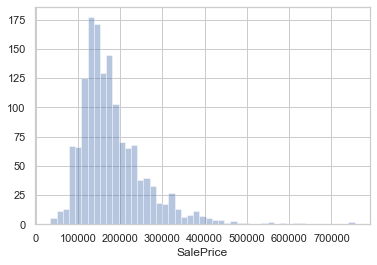

In [13]:
sns.distplot(housing.SalePrice.dropna(),kde=False)

In [14]:
housing.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

As you can see, the sale prices are right skewed. This was expected as few people can afford very expensive houses.

###### The most important numeric predictors

In [15]:
all_numVar = housing.select_dtypes(['int','float']).copy()
print(f'There are {len(all_numVar.columns)} numeric variables')

There are 37 numeric variables


In [16]:
cor_all_numVar = all_numVar.corr().abs()

In [17]:
high_corr_index = cor_all_numVar.sort_values(by='SalePrice',ascending=False)[:11].index

In [18]:
high_corr = cor_all_numVar.loc[high_corr_index,high_corr_index]

In [19]:
high_corr

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.575126,0.600744,0.565122,0.549294,0.479152,0.528483,0.389761,0.597554,0.571532
GrLivArea,0.708624,0.575126,1.000000,0.489933,0.485469,0.445276,0.562538,0.630286,0.808354,0.242666,0.316972
GarageCars,0.640409,0.600744,0.489933,1.000000,0.889700,0.437997,0.440540,0.479988,0.358053,0.538074,0.426022
GarageArea,0.623431,0.565122,0.485469,0.889700,1.000000,0.486067,0.492011,0.408487,0.328687,0.480735,0.376765
TotalBsmtSF,0.613581,0.549294,0.445276,0.437997,0.486067,1.000000,0.801670,0.327762,0.282126,0.408515,0.298107
1stFlrSF,0.605852,0.479152,0.562538,0.440540,0.492011,0.801670,1.000000,0.373077,0.391782,0.310814,0.242245
FullBath,0.560664,0.528483,0.630286,0.479988,0.408487,0.327762,0.373077,1.000000,0.527337,0.471169,0.457980
TotRmsAbvGrd,0.533723,0.389761,0.808354,0.358053,0.328687,0.282126,0.391782,0.527337,1.000000,0.114280,0.198250
YearBuilt,0.522897,0.597554,0.242666,0.538074,0.480735,0.408515,0.310814,0.471169,0.114280,1.000000,0.612235


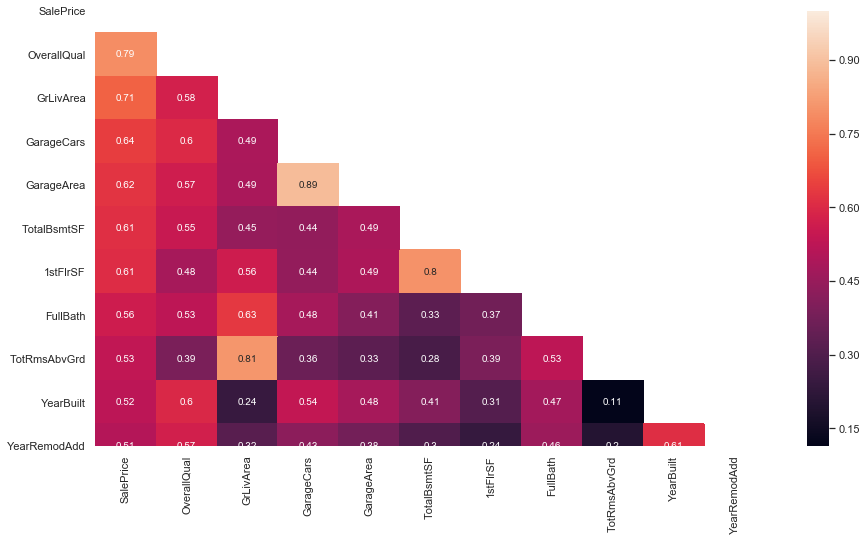

In [20]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones(high_corr.shape))
sns.heatmap(high_corr,annot=True,mask=mask)

###### Overall Quality

In [21]:
search_desc('OverallQual')

There are 0 missing values in OverallQual

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent

       9	Excellent

       8	Very Good

       7	Good

       6	Above Average

       5	Average

       4	Below Average

       3	Fair

       2	Poor

       1	Very Poor



Overall Quality has the highest correlation with SalePrice among the numeric variables (0.79). It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (very excellent).

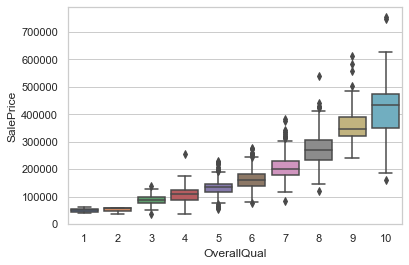

In [22]:
sns.boxplot(x='OverallQual',y='SalePrice',data=housing)

The positive correlation is certainly there indeed, and seems to be a slightly upward curve. Regarding outliers, We do not see any extreme values. If there is a candidate to take out as an outlier later on, it seems to be the expensive house with grade 4.

###### Above Grade (Ground) Living Area (square feet)

The numeric variable with the second highest correlation with SalesPrice is the Above Grade Living Area. This make a lot of sense; big houses are generally more expensive.

In [23]:
search_desc('GrLivArea')

There are 0 missing values in GrLivArea

GrLivArea: Above grade (ground) living area square feet





Numbers on plot indicate GrLivArea outlier indexes in housing dataframe


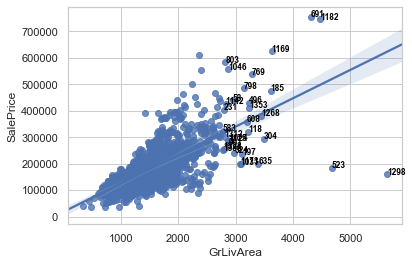

In [24]:
def outliers_index(data,series):
    q1 = data[series].quantile(.25)
    q3 = data[series].quantile(.75)
    iqr = q3 - q1
    lower_Range = q1 -(1.5 * iqr)
    upper_Range = q3 + (1.5 * iqr)
    outlier = [x for x in data[series] if x < lower_Range or x > upper_Range]
    indexes = data.index[data[series].isin(outlier)].tolist()
    return indexes


glaSalePrice = housing[['GrLivArea','SalePrice']].dropna()
g = sns.regplot(x='GrLivArea',y='SalePrice',data=glaSalePrice)
indexes = outliers_index(glaSalePrice,'GrLivArea')
pos = range(len(indexes))

for index in indexes:
     g.text(glaSalePrice.GrLivArea[index], glaSalePrice.SalePrice[index], index,
             horizontalalignment='left', size='small', color='black', weight='semibold')
print('\n\nNumbers on plot indicate GrLivArea outlier indexes in housing dataframe')

The real outliers are the one with big living areas and low SalePrices which located at `523` & `1298` index

In [25]:
housing.loc[[523, 1298]][['SalePrice', 'GrLivArea', 'OverallQual']]

,SalePrice,GrLivArea,OverallQual
523,184750.0,4676,10
1298,160000.0,5642,10


we will not take them out yet, as taking outliers can be dangerous. For instance, a low score on the Overall Quality could explain a low price. However, as you can see above, these two houses actually also score maximum points on Overall Quality. Therefore, we will keep houses 1298 and 523 in mind as prime candidates to take out as outliers.

 <hr>


###### Missing data, label encoding, and categorization variables

In [26]:
read_desc() # reading data description

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 


**After scanning the description we can tell most of the missing data are not actually missing, NULL values in the dataset mean `item not existed` example : no garage**
- so we're going to check every variable that has missing values and try fix them.Also we will try to convert object variables into ordinal integers if there is clear ordinality, or into category if levels are categories without ordinality. we will convert these categories into numeric later on by using one-hot encoding.<br>
<hr>
we will start from a variable that has the highest missing values

1st variable
 


In [27]:
# PoolQC
search_desc('PoolQC')

There are 2909 missing values in PoolQC

PoolQC: Pool quality

       Ex	Excellent

       Gd	Good

       TA	Average/Typical

       Fa	Fair

       NA	No Pool



So, it is obvious that I need to just assign ‘No Pool’ to the NAs. Also, the high number of NAs makes sense as normally only a a few houses have a pool.<br>

In [28]:
housing.PoolQC.fillna('None',inplace=True)

It is also clear that we can label encode this variable as the values are ordinal.<br>As there a multiple variables that use the same quality levels, we're going to create a dictionary that we can reuse later.

In [29]:
qualities = {'None' :0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

In [30]:
housing['PoolQC'] = housing['PoolQC'].map(qualities)

In [31]:
housing['PoolQC'].value_counts()

0    2909
5       4
4       4
2       2
Name: PoolQC, dtype: int64

In [32]:
housing['PoolQC'].dtype

dtype('int64')

Checking the related variable if there is bad data

In [33]:
housing[(housing['PoolQC']==0) & (housing['PoolArea']>0)][['PoolQC','PoolArea']]

,PoolQC,PoolArea
2420,0,368
2503,0,444
2599,0,561


In [34]:
housing[(housing['PoolQC']>0) & (housing['PoolArea']==0)][['PoolQC','PoolArea']]

,PoolQC,PoolArea


In [35]:
housing[housing.PoolArea != 0][['PoolQC','PoolArea']]

,PoolQC,PoolArea
197,5,512
810,2,648
1170,4,576
1182,5,555
1298,4,480
1386,2,519
1423,4,738
1974,5,144
2420,0,368
2503,0,444


looks PoolArea has no affect on PoolQC

In [36]:
housing[(housing['PoolQC']==0) & (housing['PoolArea']>0)][['PoolQC','PoolArea','OverallQual']]

,PoolQC,PoolArea,OverallQual
2420,0,368,4
2503,0,444,6
2599,0,561,3


going to replace 0s in PoolQC based on OverallQual

In [37]:
housing.loc[2420,'PoolQC'] = 2
housing.loc[2503,'PoolQC'] = 3
housing.loc[2599,'PoolQC'] = 2

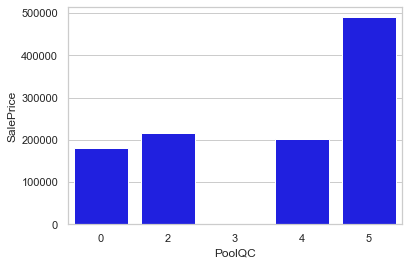

In [38]:
sns.barplot(x='PoolQC',y='SalePrice',data=housing,color='blue',ci=None);

<hr>
2nd variable

In [39]:
search_desc('MiscFeature')

There are 2814 missing values in MiscFeature

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator

       Gar2	2nd Garage (if not described in garage section)

       Othr	Other

       Shed	Shed (over 100 SF)

       TenC	Tennis Court

       NA	None



We will fill NAs with None. Also as the values are not ordinal, we will convert MiscFeature into a categorical type

In [40]:
housing.MiscFeature.fillna('None',inplace=True)

In [41]:
housing['MiscFeature'] = housing['MiscFeature'].astype('category')

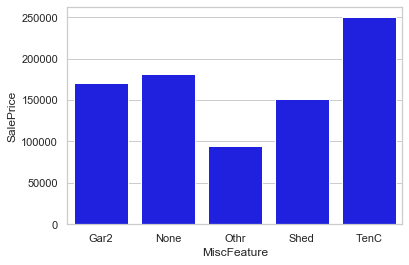

In [42]:
sns.barplot(x='MiscFeature',y='SalePrice',data=housing,color='blue',ci=None);

When looking at the frequencies, the variable seems irrelevant to me. Having a shed probably means ‘no Garage’, which would explain the lower sales price for Shed. Also, while it makes a lot of sense that a house with a Tennis court is expensive, there is only one house with a tennis court in the training set.

<hr>
3rd variable

In [43]:
search_desc('Alley')

There are 2721 missing values in Alley

Alley: Type of alley access to property

       Grvl	Gravel

       Pave	Paved

       NA 	No alley access



We will fill NAs with None. Also as the values are not ordinal, we will convert Alley into a categorical type

In [44]:
housing.Alley.fillna('None',inplace=True)

In [45]:
housing['Alley'] = housing['Alley'].astype('category')

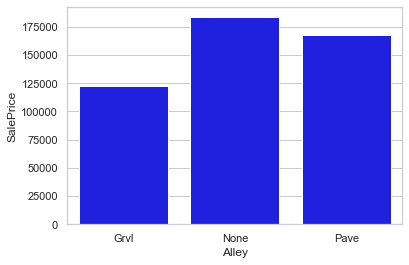

In [46]:
sns.barplot(x='Alley',y='SalePrice',data=housing,color='blue',ci=None);

<hr>
4th variable

In [47]:
search_desc('Fence')

There are 2348 missing values in Fence

Fence: Fence quality

       GdPrv	Good Privacy

       MnPrv	Minimum Privacy

       GdWo	Good Wood

       MnWw	Minimum Wood/Wire

       NA	No Fence



We will fill NAs with None. Also as the values are not ordinal, we will convert Fence into a categorical type

In [48]:
housing.Fence.fillna('None',inplace=True)

In [49]:
housing['Fence'] = housing['Fence'].astype('category')

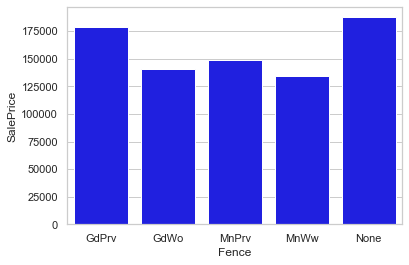

In [50]:
sns.barplot(x='Fence',y='SalePrice',data=housing,color='blue',ci=None);

<hr>
5th variable

In [51]:
search_desc('FireplaceQu')

There are 1420 missing values in FireplaceQu

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace

       Gd	Good - Masonry Fireplace in main level

       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement

       Fa	Fair - Prefabricated Fireplace in basement

       Po	Poor - Ben Franklin Stove

       NA	No Fireplace



we will replace NAs with None. Also the values are ordinal, so we can use the Qualities dict that we have already created for the Pool Quality.

In [52]:
housing.FireplaceQu.fillna('None',inplace=True)

In [53]:
housing['FireplaceQu'] = housing['FireplaceQu'].map(qualities)

In [54]:
housing['FireplaceQu'].value_counts()

0    1420
4     744
3     592
2      74
1      46
5      43
Name: FireplaceQu, dtype: int64

In [55]:
housing['FireplaceQu'].dtype

dtype('int64')

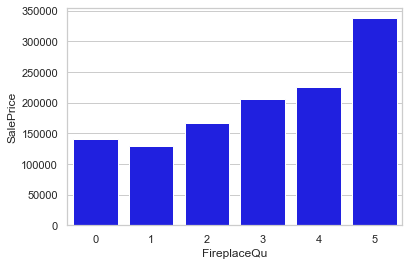

In [56]:
sns.barplot(x='FireplaceQu',y='SalePrice',data=housing,color='blue',ci=None);

Checking the related variable if there is bad data

In [57]:
search_desc('Fireplaces')

There are 0 missing values in Fireplaces

Fireplaces: Number of fireplaces



In [58]:
housing['Fireplaces'].value_counts().sum() == housing['FireplaceQu'].value_counts().sum()

True

In [59]:
housing[ (housing['FireplaceQu'] ==0) & (housing['Fireplaces'] > 0)][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu


looks  good

<hr>
6th variables<br>

LotFrontage

In [60]:
search_desc('LotFrontage')

There are 486 missing values in LotFrontage

LotFrontage: Linear feet of street connected to property



We are going to take the median LotFrontage per neigborhood and fill the NAs with it.

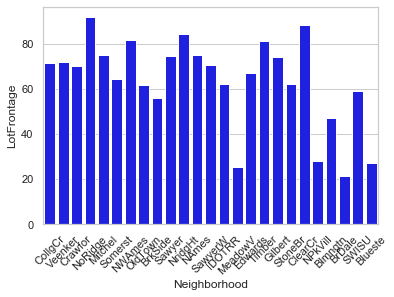

In [61]:
g = sns.barplot(x='Neighborhood',y='LotFrontage',data=housing,color='Blue',ci=None)
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=45);

In [62]:
# pd.DataFrame(housing.groupby(['Neighborhood'])['LotFrontage'].median())

In [63]:
housing['LotFrontage'] = housing.groupby(['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [64]:
housing['LotFrontage'].isna().sum()

0

In [65]:
housing['LotFrontage'].dtype

dtype('float64')

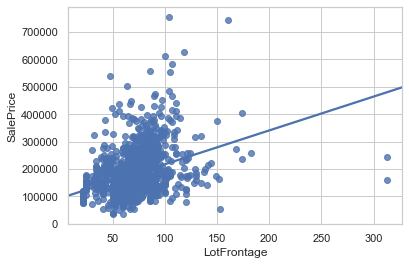

In [66]:
g = sns.regplot(x='LotFrontage',y='SalePrice',data=housing,ci=None)

<hr>

LotShape

In [67]:
search_desc('LotShape')

There are 0 missing values in LotShape

LotShape: General shape of property

       Reg	Regular	

       IR1	Slightly irregular

       IR2	Moderately Irregular

       IR3	Irregular



Values look ordinal

In [68]:
reg = {'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}
housing['LotShape'] = housing['LotShape'].map(reg)
housing.LotShape.value_counts()

3    1859
2     968
1      76
0      16
Name: LotShape, dtype: int64

In [69]:
housing.LotShape.dtype

dtype('int64')

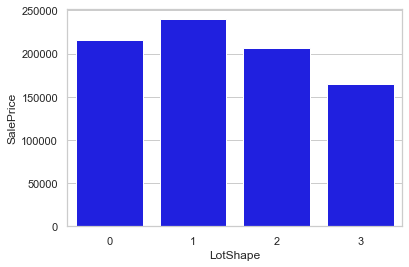

In [70]:
g = sns.barplot(x='LotShape',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>
LotConfig

In [71]:
search_desc('LotConfig')

There are 0 missing values in LotConfig

LotConfig: Lot configuration

       Inside	Inside lot

       Corner	Corner lot

       CulDSac	Cul-de-sac

       FR2	Frontage on 2 sides of property

       FR3	Frontage on 3 sides of property



convert it to category type

In [72]:
housing['LotConfig'] = housing['LotConfig'].astype('category')

In [73]:
housing['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [74]:
housing['LotConfig'].dtype

CategoricalDtype(categories=['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], ordered=False)

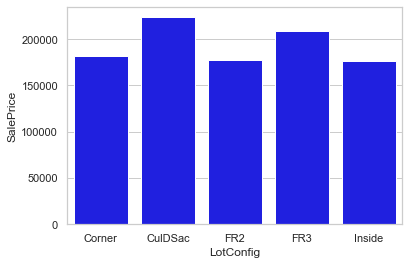

In [75]:
g = sns.barplot(x='LotConfig',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>
7th variables<br>
Garage related variables

In [77]:
search_desc('GarageYrBlt')

There are 159 missing values in GarageYrBlt

GarageYrBlt: Year garage was built



In [78]:
search_desc('GarageType')

There are 157 missing values in GarageType

GarageType: Garage location

       2Types	More than one type of garage

       Attchd	Attached to home

       Basment	Basement Garage

       BuiltIn	Built-In (Garage part of house - typically has room above garage)

       CarPort	Car Port

       Detchd	Detached from home

       NA	No Garage



In [79]:
search_desc('GarageFinish')

There are 159 missing values in GarageFinish

GarageFinish: Interior finish of the garage

       Fin	Finished

       RFn	Rough Finished	

       Unf	Unfinished

       NA	No Garage



In [80]:
search_desc('GarageCond')

There are 159 missing values in GarageCond

GarageCond: Garage condition

       Ex	Excellent

       Gd	Good

       TA	Typical/Average

       Fa	Fair

       Po	Poor

       NA	No Garage



In [81]:
search_desc('GarageQual')

There are 159 missing values in GarageQual

GarageQual: Garage quality

       Ex	Excellent

       Gd	Good

       TA	Typical/Average

       Fa	Fair

       Po	Poor

       NA	No Garage



In [82]:
search_desc('GarageCars')

There are 1 missing values in GarageCars

GarageCars: Size of garage in car capacity



In [83]:
search_desc('GarageArea')

There are 1 missing values in GarageArea

GarageArea: Size of garage in square feet



we will replace the NAs in GarageYrBlt with house built year

In [84]:
housing['GarageYrBlt'] = np.where(housing['GarageYrBlt'].isnull(),
                                  housing['YearBuilt'], housing['GarageYrBlt']).astype(int)


In [85]:
housing['GarageYrBlt'].isna().sum()

0

<hr>
GarageType has less missing values!<br>
Find the 2 additional NAs in other variables

In [86]:
housing[(housing.GarageType.notna()) & 
        (housing.GarageFinish.isna())]\
[['GarageCars', 'GarageArea', 'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish']]


,GarageCars,GarageArea,GarageType,GarageCond,GarageQual,GarageFinish
2126,1.0,360.0,Detchd,NaN,NaN,NaN
2576,NaN,NaN,Detchd,NaN,NaN,NaN


The 157 NAs within GarageType all turn out to be NA in GarageCondition, GarageQuality, and GarageFinish as well. The differences are found in houses 2126 and 2576. As you can see, house 2126 actually does seem to have a Garage and house 2576 does not. Therefore, there should be 158 houses without a Garage. To fix house 2126, I will imputate the most common values (modes) for GarageCond, GarageQual, and GarageFinish.

In [87]:
housing.loc[2126,'GarageCond'] = housing.GarageCond.mode()[0]
housing.loc[2126,'GarageQual'] = housing.GarageQual.mode()[0]
housing.loc[2126,'GarageFinish'] = housing.GarageFinish.mode()[0]

In [88]:
housing[(housing.GarageType.notna()) & 
        (housing.GarageFinish.isna())][['GarageCars', 'GarageArea', 'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish']]


,GarageCars,GarageArea,GarageType,GarageCond,GarageQual,GarageFinish
2576,NaN,NaN,Detchd,NaN,NaN,NaN


In [89]:
housing.loc[2576,'GarageCars'] = 0
housing.loc[2576,'GarageArea'] = 0
housing.loc[2576,'GarageType'] = np.nan

In [90]:
housing[(housing.GarageType.notna()) & 
        (housing.GarageFinish.isna())][['GarageCars', 'GarageArea', 'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish']]


,GarageCars,GarageArea,GarageType,GarageCond,GarageQual,GarageFinish


Now, the 4 variables related to garage all have the same set of 158 NAs, which correspond to `No Garage`.

In [498]:
len(housing[(housing.GarageType.isna()) &
            (housing.GarageFinish.isna()) &
            (housing.GarageCond.isna()) &
            (housing.GarageQual.isna())])

158

Now, we will fix the missing values

GarageType :  The values do not seem ordinal, so I will convert into a category.

In [499]:
housing['GarageType'].fillna('No Garage',inplace=True)

In [500]:
housing['GarageType'] = housing['GarageType'].astype('category')

In [501]:
housing['GarageType'].value_counts()

Attchd       1723
Detchd        778
BuiltIn       186
No Garage     158
Basment        36
2Types         23
CarPort        15
Name: GarageType, dtype: int64

In [502]:
housing['GarageType'].isna().sum()

0

In [503]:
housing['GarageType'].dtype

CategoricalDtype(categories=['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort',
                  'Detchd', 'No Garage'],
                 ordered=False)

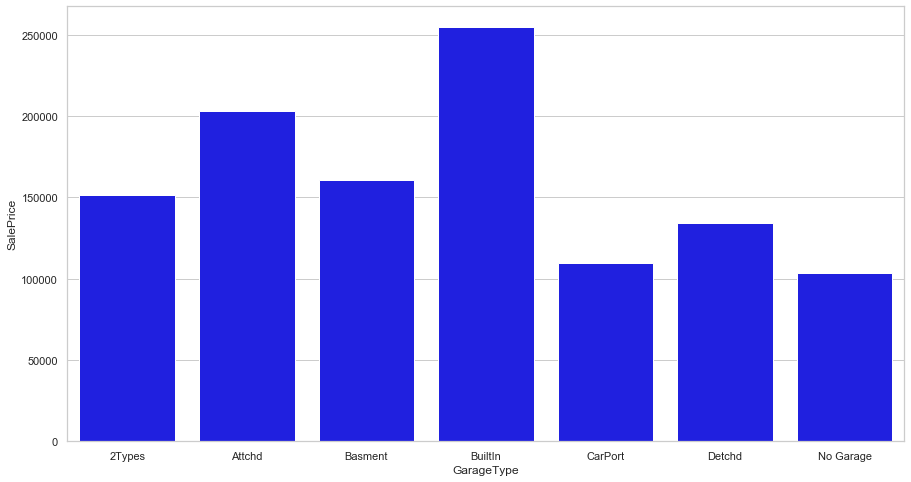

In [504]:
g = sns.barplot(x='GarageType',y='SalePrice',data=housing,color='Blue',ci=None)

GarageFinish:The values are ordinal.

In [505]:
housing['GarageFinish'].fillna('None',inplace=True)

In [506]:
garagef = {'None':0, 'Unf':1, 'RFn':2, 'Fin':3}
housing['GarageFinish'] = housing['GarageFinish'].map(garagef)

In [507]:
housing['GarageFinish'].value_counts()

1    1231
2     811
3     719
0     158
Name: GarageFinish, dtype: int64

In [508]:
housing['GarageFinish'].isna().sum()

0

In [509]:
housing['GarageFinish'].dtype

dtype('int64')

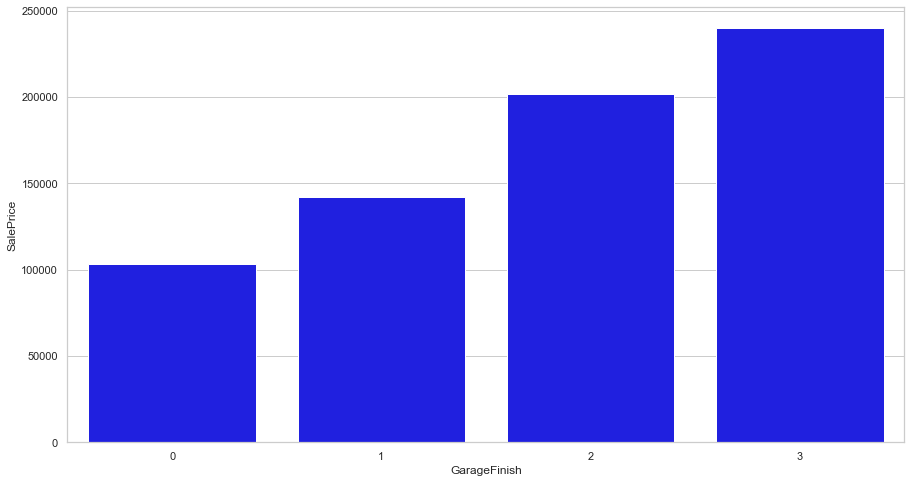

In [510]:
g = sns.barplot(x='GarageFinish',y='SalePrice',data=housing,color='Blue',ci=None)

GarageQual:The values are ordinal and we can use our quality dict

In [511]:
housing['GarageQual'].fillna('None',inplace=True)

In [512]:
housing['GarageQual'] = housing['GarageQual'].map(qualities)

In [513]:
housing['GarageQual'].value_counts()

3    2605
0     158
2     124
4      24
1       5
5       3
Name: GarageQual, dtype: int64

In [514]:
housing['GarageQual'].isna().sum()

0

In [515]:
housing['GarageQual'].dtype

dtype('int64')

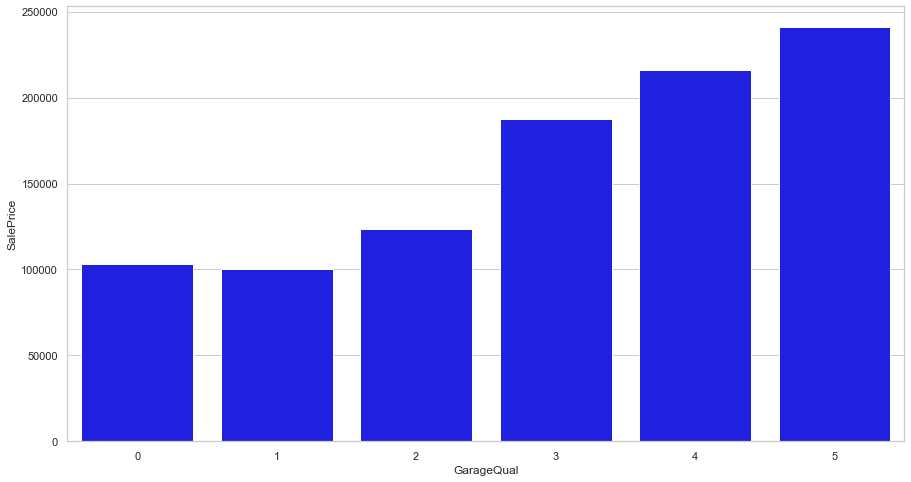

In [516]:
g = sns.barplot(x='GarageQual',y='SalePrice',data=housing,color='Blue',ci=None)

GarageCond: The values are ordinal and we can use our quality dict

In [517]:
housing['GarageCond'].fillna('None',inplace=True)
housing['GarageCond'] = housing['GarageCond'].map(qualities)

In [518]:
housing['GarageCond'].value_counts()

3    2655
0     158
2      74
4      15
1      14
5       3
Name: GarageCond, dtype: int64

In [519]:
housing['GarageCond'].isna().sum()

0

In [520]:
housing['GarageCond'].dtype

dtype('int64')

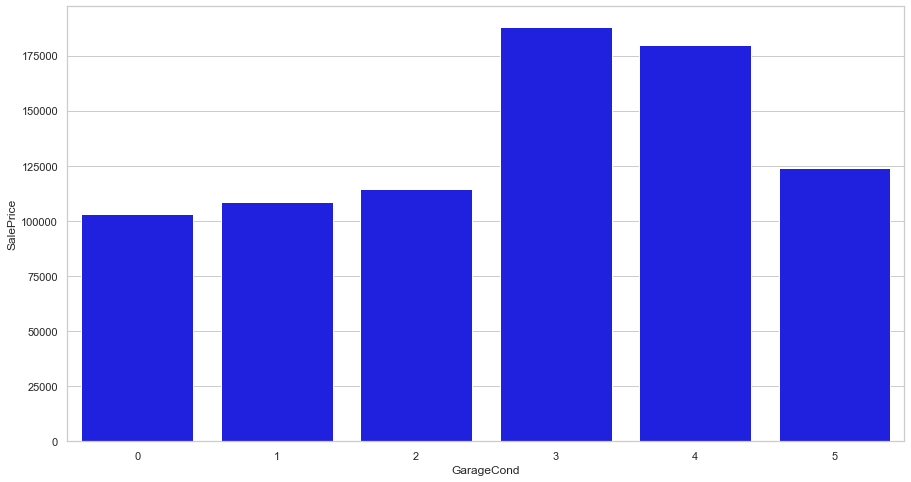

In [521]:
g = sns.barplot(x='GarageCond',y='SalePrice',data=housing,color='Blue',ci=None)

<hr><br>
8th variables<br>
Basement related variables

In [522]:
search_desc('BsmtQual')

There are 81 missing values in BsmtQual

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	

       Gd	Good (90-99 inches)

       TA	Typical (80-89 inches)

       Fa	Fair (70-79 inches)

       Po	Poor (<70 inches

       NA	No Basement



In [523]:
search_desc('BsmtCond')

There are 82 missing values in BsmtCond

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent

       Gd	Good

       TA	Typical - slight dampness allowed

       Fa	Fair - dampness or some cracking or settling

       Po	Poor - Severe cracking, settling, or wetness

       NA	No Basement



In [524]:
search_desc('BsmtExposure')

There are 82 missing values in BsmtExposure

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure

       Av	Average Exposure (split levels or foyers typically score average or above)	

       Mn	Mimimum Exposure

       No	No Exposure

       NA	No Basement



In [525]:
search_desc('BsmtFinType1')

There are 79 missing values in BsmtFinType1

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters

       ALQ	Average Living Quarters

       BLQ	Below Average Living Quarters	

       Rec	Average Rec Room

       LwQ	Low Quality

       Unf	Unfinshed

       NA	No Basement



In [526]:
search_desc('BsmtFinType2')

There are 80 missing values in BsmtFinType2

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters

       ALQ	Average Living Quarters

       BLQ	Below Average Living Quarters	

       Rec	Average Rec Room

       LwQ	Low Quality

       Unf	Unfinshed

       NA	No Basement



check if all 79 NAs are the same observations among the variables with 80+ NAs

In [527]:
len( housing[(housing.BsmtQual.isna()) & (housing.BsmtCond.isna()) 
             & (housing.BsmtExposure.isna()) & (housing.BsmtFinType1.isna()) & 
            (housing.BsmtFinType2.isna()) ])

79

Find the additional NAs; BsmtFinType1 is the one with 79 NAs

In [528]:
housing[ housing.BsmtFinType1.notna() &
        (housing.BsmtCond.isna() |
         housing.BsmtExposure.isna() | 
         housing.BsmtFinType2.isna() | 
         housing.BsmtQual.isna())][['BsmtFinType1','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2']]\
.style.highlight_null('yellow')

,BsmtFinType1,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2
332,GLQ,Gd,TA,No,nan
948,Unf,Gd,TA,nan,Unf
1487,Unf,Gd,TA,nan,Unf
2040,GLQ,Gd,nan,Mn,Rec
2185,BLQ,TA,nan,No,Unf
2217,Unf,nan,Fa,No,Unf
2218,Unf,nan,TA,No,Unf
2348,Unf,Gd,TA,nan,Unf
2524,ALQ,TA,nan,Av,Unf


going to impute the modes to fix those 9 houses.

In [529]:
housing.loc[332,'BsmtFinType2'] = housing.BsmtFinType2.mode()[0]
housing.loc[[948,1487,2348],'BsmtExposure'] = housing.BsmtExposure.mode()[0]
housing.loc[[2040,2185,2524],'BsmtCond'] = housing.BsmtCond.mode()[0]
housing.loc[[2217,2218],'BsmtQual'] = housing.BsmtQual.mode()[0]

In [530]:
housing.loc[[332,948,1487,2040,2185,2217,2218,2348,2524],\
            ['BsmtFinType1','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2']]

,BsmtFinType1,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2
332,GLQ,Gd,TA,No,Unf
948,Unf,Gd,TA,No,Unf
1487,Unf,Gd,TA,No,Unf
2040,GLQ,Gd,TA,Mn,Rec
2185,BLQ,TA,TA,No,Unf
2217,Unf,TA,Fa,No,Unf
2218,Unf,TA,TA,No,Unf
2348,Unf,Gd,TA,No,Unf
2524,ALQ,TA,TA,Av,Unf


Now the 5 variables have 79 houses with `no basement`,we are going to fill the missing values and catogory/hot encode them below.

BsmtQual : A variable than can be made ordinal with the qualities dict.

In [531]:
housing.BsmtQual.fillna('None',inplace=True)

In [532]:
housing['BsmtQual'] = housing['BsmtQual'].map(qualities)

In [533]:
housing['BsmtQual'].value_counts()

3    1285
4    1209
5     258
2      88
0      79
Name: BsmtQual, dtype: int64

In [534]:
housing['BsmtQual'].isna().sum()

0

In [535]:
housing['BsmtQual'].dtype

dtype('int64')

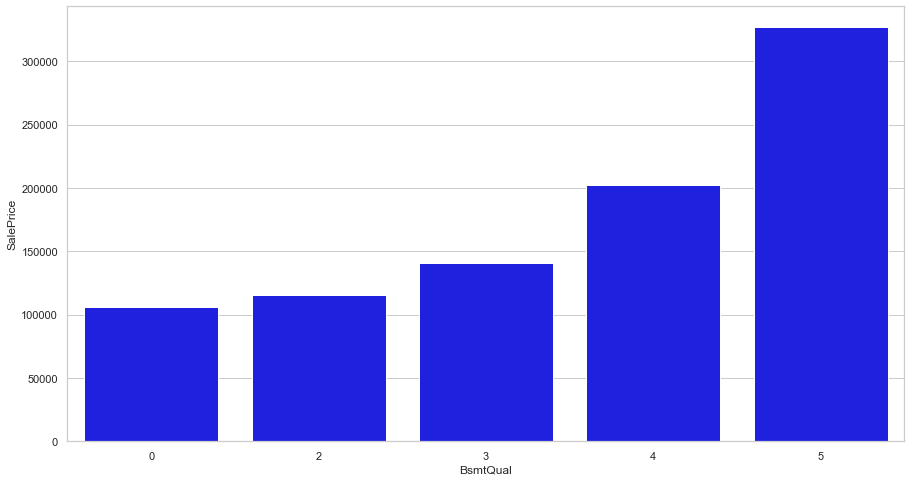

In [536]:
g = sns.barplot(x='BsmtQual',y='SalePrice',data=housing,color='Blue',ci=None)

BsmtCond: : A variable than can be made ordinal with the qualities dict.

In [537]:
housing.BsmtCond.fillna('None',inplace=True)

In [538]:
housing['BsmtCond'] = housing['BsmtCond'].map(qualities)

In [539]:
housing['BsmtCond'].value_counts()

3    2609
4     122
2     104
0      79
1       5
Name: BsmtCond, dtype: int64

In [540]:
housing['BsmtCond'].isna().sum()

0

In [541]:
housing['BsmtCond'].dtype

dtype('int64')

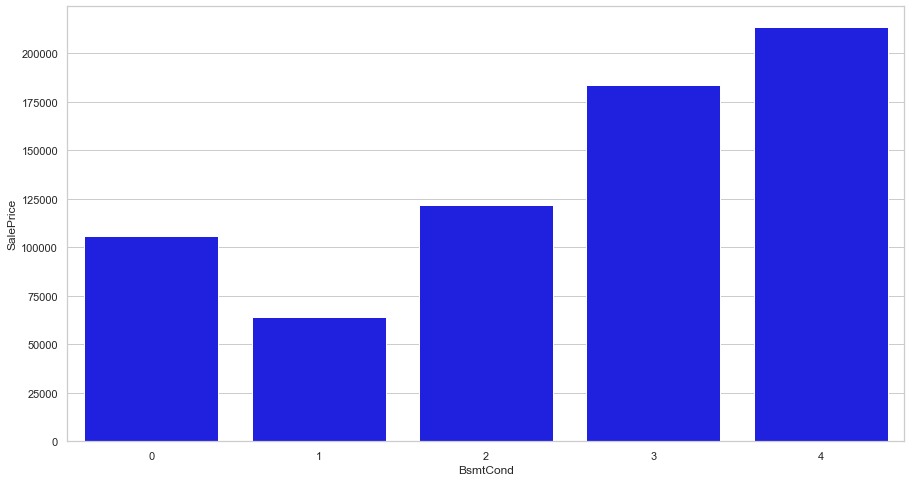

In [542]:
g = sns.barplot(x='BsmtCond',y='SalePrice',data=housing,color='Blue',ci=None)

BsmtExposure: A variable than can be made ordinal.

In [543]:
housing.BsmtExposure.fillna('None',inplace=True)

In [544]:
exposure = {'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}

In [545]:
housing['BsmtExposure'] = housing['BsmtExposure'].map(exposure)

In [546]:
housing['BsmtExposure'].value_counts()

1    1907
3     418
4     276
2     239
0      79
Name: BsmtExposure, dtype: int64

In [547]:
housing['BsmtExposure'].isna().sum()

0

In [548]:
housing['BsmtExposure'].dtype

dtype('int64')

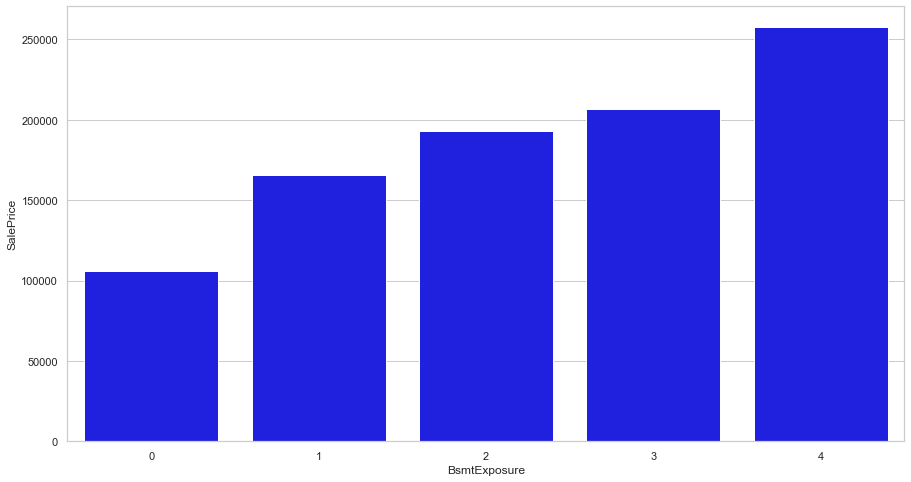

In [549]:
g = sns.barplot(x='BsmtExposure',y='SalePrice',data=housing,color='Blue',ci=None)

BsmtFinType1: A variable than can be made ordinal.

In [550]:
housing.BsmtFinType1.fillna('None',inplace=True)

In [551]:
Basementfintype = {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}

In [552]:
housing['BsmtFinType1'] = housing['BsmtFinType1'].map(Basementfintype)

In [553]:
housing['BsmtFinType1'].value_counts()

1    851
6    849
5    429
3    288
4    269
2    154
0     79
Name: BsmtFinType1, dtype: int64

In [554]:
housing['BsmtFinType1'].isna().sum()

0

In [555]:
housing['BsmtFinType1'].dtype

dtype('int64')

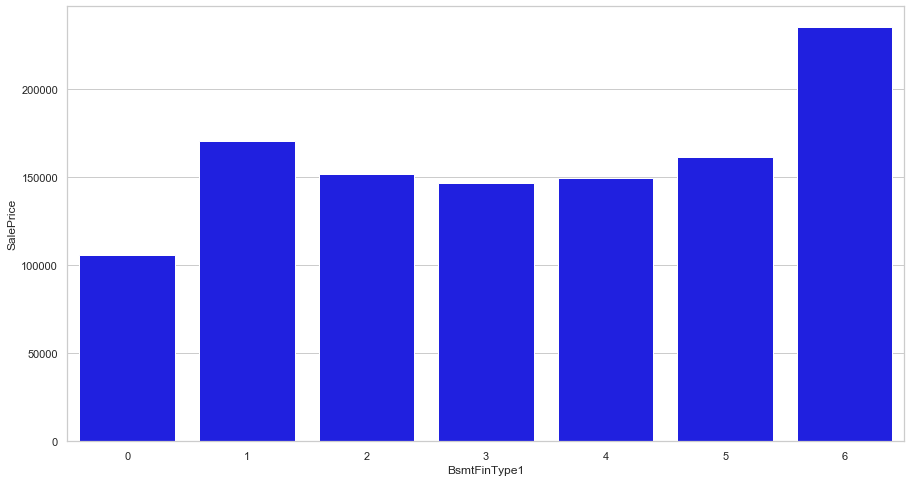

In [556]:
g = sns.barplot(x='BsmtFinType1',y='SalePrice',data=housing,color='Blue',ci=None)

BsmtFinType2:  A variable than can be made ordinal with Basementfintype dict 

In [557]:
housing.BsmtFinType2.fillna('None',inplace=True)

In [558]:
housing['BsmtFinType2'] = housing['BsmtFinType2'].map(Basementfintype)

In [559]:
housing['BsmtFinType2'].value_counts()

1    2494
3     105
2      87
0      79
4      68
5      52
6      34
Name: BsmtFinType2, dtype: int64

In [560]:
housing['BsmtFinType2'].isna().sum()

0

In [561]:
housing['BsmtFinType2'].dtype

dtype('int64')

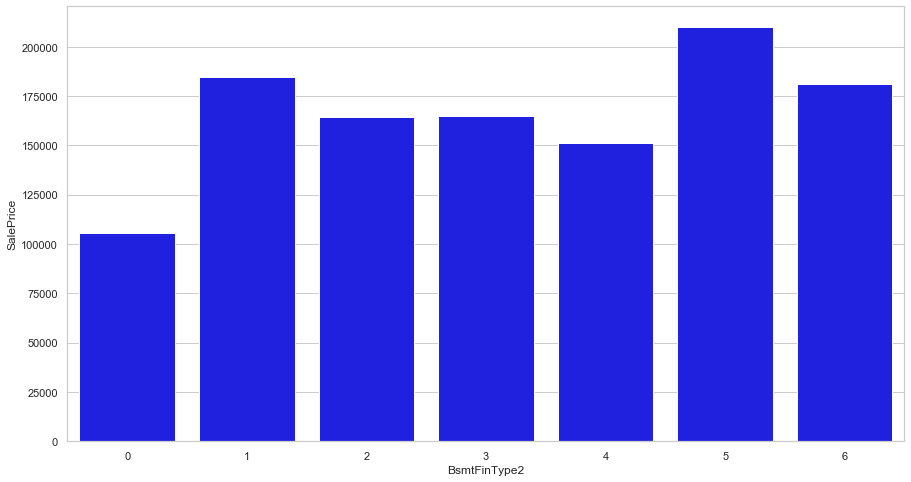

In [562]:
g = sns.barplot(x='BsmtFinType2',y='SalePrice',data=housing,color='Blue',ci=None)

dealing with other basement variables that have 1 or 2 NAs.

In [563]:
search_desc('BsmtFullBath')

There are 2 missing values in BsmtFullBath

BsmtFullBath: Basement full bathrooms



In [564]:
search_desc('BsmtHalfBath')

There are 2 missing values in BsmtHalfBath

BsmtHalfBath: Basement half bathrooms



In [565]:
search_desc('BsmtFinSF1')

There are 1 missing values in BsmtFinSF1

BsmtFinSF1: Type 1 finished square feet



In [566]:
search_desc('BsmtFinSF2')

There are 1 missing values in BsmtFinSF2

BsmtFinSF2: Type 2 finished square feet



In [567]:
search_desc('BsmtUnfSF')

There are 1 missing values in BsmtUnfSF

BsmtUnfSF: Unfinished square feet of basement area



In [568]:
search_desc('TotalBsmtSF')

There are 1 missing values in TotalBsmtSF

TotalBsmtSF: Total square feet of basement area



check what if they dont present

In [569]:
housing[housing.BsmtFullBath.isna() |
       housing.BsmtHalfBath.isna() |
       housing.BsmtFinSF1.isna() |
       housing.BsmtFinSF2.isna() |
       housing.BsmtUnfSF.isna() |
       housing.TotalBsmtSF.isna() ]\
[['BsmtQual', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2120,0,NaN,NaN,NaN,NaN,NaN,NaN
2188,0,NaN,NaN,0.0,0.0,0.0,0.0


it should be obvious that those remaining NAs all refer to ‘not present’. Below, we're fixing those remaining variables.

In [570]:
housing.BsmtFullBath.fillna(0,inplace=True)
housing.BsmtHalfBath.fillna(0,inplace=True)
housing.BsmtFinSF1.fillna(0,inplace=True)
housing.BsmtFinSF2.fillna(0,inplace=True)
housing.BsmtUnfSF.fillna(0,inplace=True)
housing.TotalBsmtSF.fillna(0,inplace=True)

In [571]:
housing.BsmtFullBath.isna().sum()

0

In [572]:
housing.BsmtFullBath.dtype

dtype('float64')

In [573]:
housing.BsmtHalfBath.isna().sum()

0

In [574]:
housing.BsmtHalfBath.dtype

dtype('float64')

In [575]:
housing.BsmtFinSF1.isna().sum()

0

In [576]:
housing.BsmtFinSF1.dtype

dtype('float64')

In [577]:
housing.BsmtFinSF2.isna().sum()

0

In [578]:
housing.BsmtFinSF2.dtype

dtype('float64')

In [579]:
housing.BsmtUnfSF.isna().sum()

0

In [580]:
housing.BsmtUnfSF.dtype

dtype('float64')

In [581]:
housing.TotalBsmtSF.isna().sum()

0

In [582]:
housing.TotalBsmtSF.dtype

dtype('float64')

<hr>
9th varibles<br>
masonry

In [583]:
search_desc('MasVnrType')

There are 24 missing values in MasVnrType

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common

       BrkFace	Brick Face

       CBlock	Cinder Block

       None	None

       Stone	Stone



In [584]:
search_desc('MasVnrArea')

There are 23 missing values in MasVnrArea

MasVnrArea: Masonry veneer area in square feet



there are 24 types missing while 23 area are not recoreded. If a house has a veneer area, it should also have a masonry veneer type. Let’s fix this.

In [585]:
len(housing[housing.MasVnrType.isna() & housing.MasVnrArea.isna()])

23

find the one that should have a MasVnrType

In [586]:
housing[housing.MasVnrType.isna() & housing.MasVnrArea.notna()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
2610,NaN,198.0


Can't be None. find the second mode

In [587]:
#fix this veneer type by filling the mode. taking the 2nd value as the 1st is 'none'
housing.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [588]:
housing.loc[2610,'MasVnrType'] = 'BrkFace'

now only 23 houses that have no masonry.<br>
Will check the ordinality below in MasVnrType. and fill missing values with none



In [589]:
housing.MasVnrType.fillna('None',inplace=True)

In [590]:
# we will make the ordinality accordingly.
masonrydict = {'None':0, 'BrkCmn':0, 'BrkFace':1, 'Stone':2}

In [591]:
housing['MasVnrType'] = housing['MasVnrType'].map(masonrydict)

In [592]:
housing['MasVnrType'].value_counts()

0    1790
1     880
2     249
Name: MasVnrType, dtype: int64

In [593]:
housing['MasVnrType'].isna().sum()

0

In [594]:
housing['MasVnrType'].dtype

dtype('int64')

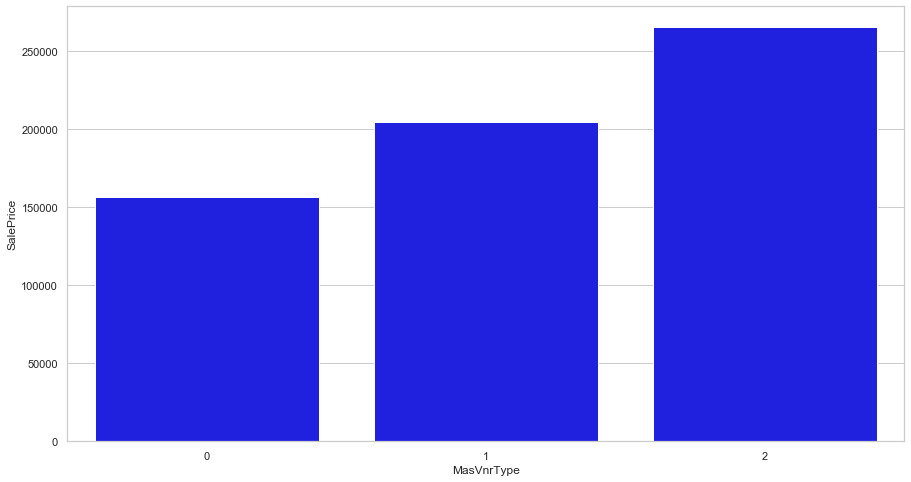

In [595]:
g = sns.barplot(x='MasVnrType',y='SalePrice',data=housing,color='Blue',ci=None)

we will fill MasVnrArea missing values with 0s

In [596]:
housing.MasVnrArea.fillna(0,inplace=True)

In [597]:
housing.MasVnrArea.dtype

dtype('float64')

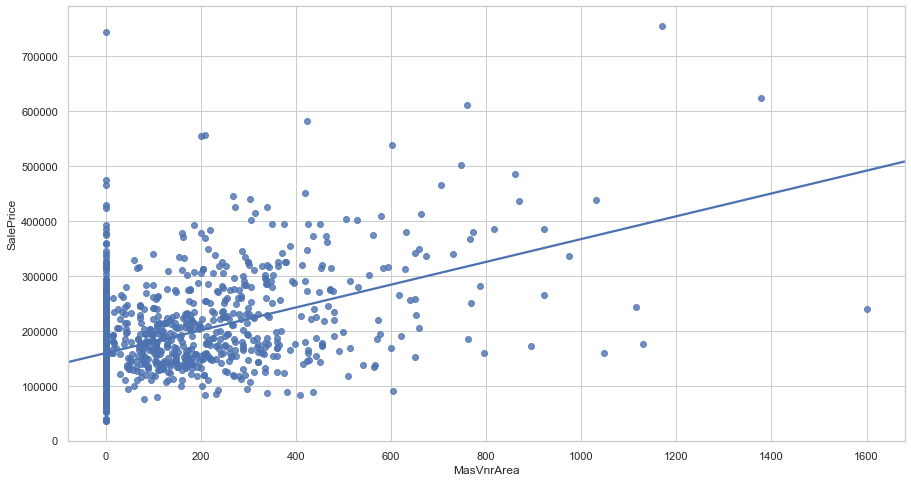

In [598]:
g = sns.regplot(x='MasVnrArea',y='SalePrice',data=housing,ci=None)

<hr>
10th varible <br>
MSZoning

In [599]:
search_desc('MSZoning')

There are 4 missing values in MSZoning

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential Low Density Park 

       RM	Residential Medium Density



here we will fill with mode and convert the type to cateogry

In [600]:
housing.MSZoning.fillna(housing.MSZoning.mode()[0],inplace=True)

In [601]:
housing['MSZoning'] = housing['MSZoning'].astype('category')

In [602]:
housing.MSZoning.value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [603]:
housing.MSZoning.isna().sum()

0

In [604]:
housing.MSZoning.dtype

CategoricalDtype(categories=['C (all)', 'FV', 'RH', 'RL', 'RM'], ordered=False)

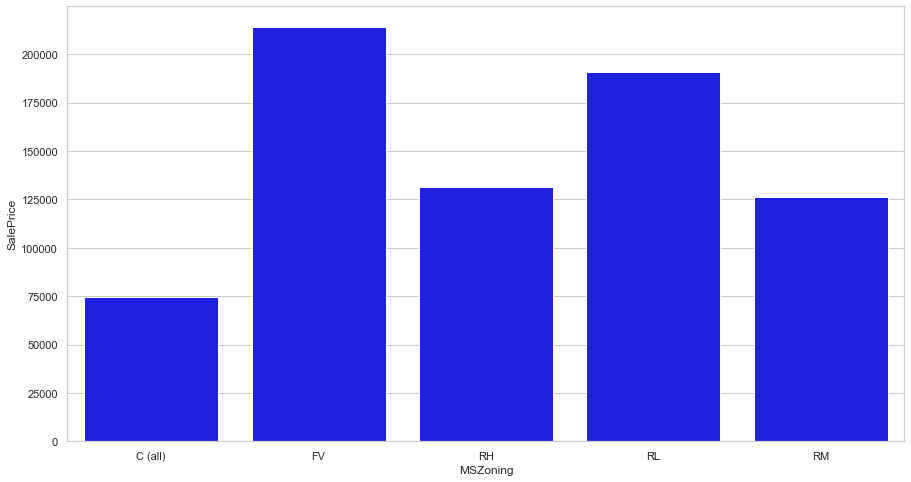

In [605]:
g = sns.barplot(x='MSZoning',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>
11th varible <br>
KitchenQual

In [606]:
search_desc('KitchenQual')

There are 1 missing values in KitchenQual

KitchenQual: Kitchen quality

       Ex	Excellent

       Gd	Good

       TA	Typical/Average

       Fa	Fair

       Po	Poor



here we will fill with mode. Can be made ordinal with the qualities dict.

In [607]:
housing.KitchenQual.fillna(housing.KitchenQual.mode()[0],inplace=True)

In [608]:
housing['KitchenQual'] = housing['KitchenQual'].map(qualities)

In [609]:
housing['KitchenQual'].value_counts()

3    1493
4    1151
5     205
2      70
Name: KitchenQual, dtype: int64

In [610]:
housing['KitchenQual'].isna().sum()

0

In [611]:
housing['KitchenQual'].dtype

dtype('int64')

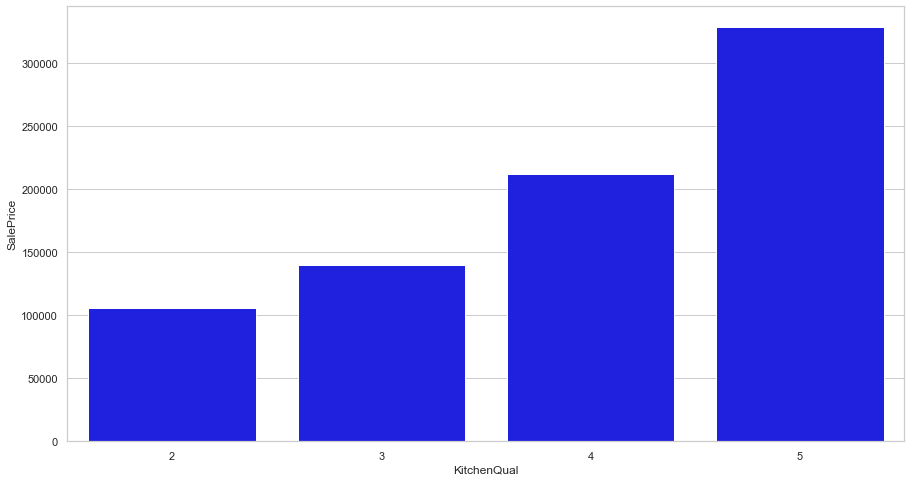

In [612]:
g = sns.barplot(x='KitchenQual',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>
12th varible <br>
Utilities

In [613]:
search_desc('Utilities')

There are 2 missing values in Utilities

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)	

       NoSewr	Electricity, Gas, and Water (Septic Tank)

       NoSeWa	Electricity and Gas Only

       ELO	Electricity only	



In [614]:
housing.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

since there is only one value with `NoSeWa` in the dataset and the others are `AllPub`. and if we fill the NAs with mode(AllPub). it wont make differences in the model later on. So we will drop this column.

In [615]:
housing.drop('Utilities',axis=1,inplace=True)

<hr>
13th varible <br>
Functional

In [616]:
search_desc('Functional')

There are 2 missing values in Functional

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality

       Min1	Minor Deductions 1

       Min2	Minor Deductions 2

       Mod	Moderate Deductions

       Maj1	Major Deductions 1

       Maj2	Major Deductions 2

       Sev	Severely Damaged

       Sal	Salvage only



2 NAs . Can be made ordinal 

In [617]:
housing.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

fill 2 NAs with the mode 

In [618]:
housing.Functional.fillna('Typ',inplace=True)

In [619]:
functionaldict = {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}

In [620]:
housing['Functional'] = housing['Functional'].map(functionaldict)

In [621]:
housing.Functional.value_counts()

7    2719
5      70
6      65
4      35
3      19
2       9
1       2
Name: Functional, dtype: int64

In [622]:
housing.Functional.isna().sum()

0

In [623]:
housing.Functional.dtype

dtype('int64')

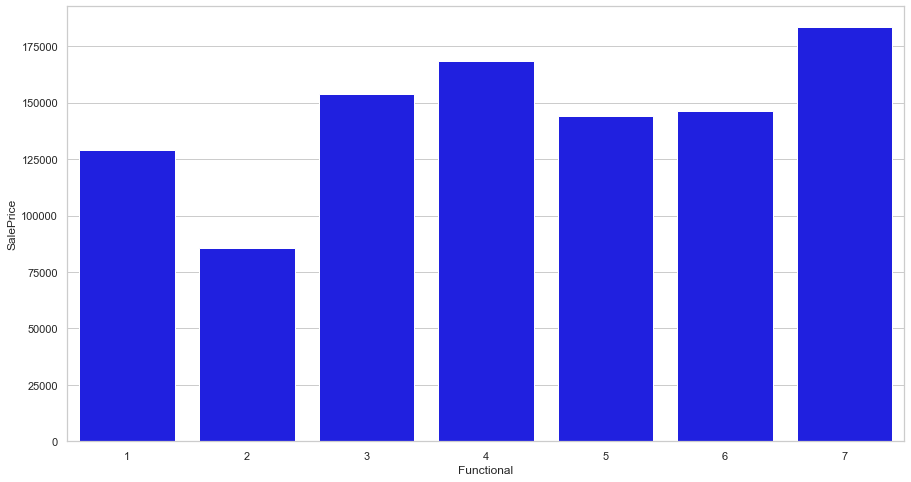

In [624]:
g = sns.barplot(x='Functional',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>
14th varibles <br>
exterior variables

In [625]:
search_desc('Exterior1st')

There are 1 missing values in Exterior1st

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles

       AsphShn	Asphalt Shingles

       BrkComm	Brick Common

       BrkFace	Brick Face

       CBlock	Cinder Block

       CemntBd	Cement Board

       HdBoard	Hard Board

       ImStucc	Imitation Stucco

       MetalSd	Metal Siding

       Other	Other

       Plywood	Plywood

       PreCast	PreCast	

       Stone	Stone

       Stucco	Stucco

       VinylSd	Vinyl Siding

       Wd Sdng	Wood Siding

       WdShing	Wood Shingles



1 Na. Values are categorical.<br>
will fill the one Na with mode and convert the type to category

In [626]:
housing.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [627]:
housing.Exterior1st.fillna('VinylSd',inplace=True)

In [628]:
housing['Exterior1st'] = housing['Exterior1st'].astype('category')

In [629]:
housing['Exterior1st'].isna().sum()

0

In [630]:
housing['Exterior1st'].dtype

CategoricalDtype(categories=['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock',
                  'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Plywood',
                  'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
                 ordered=False)

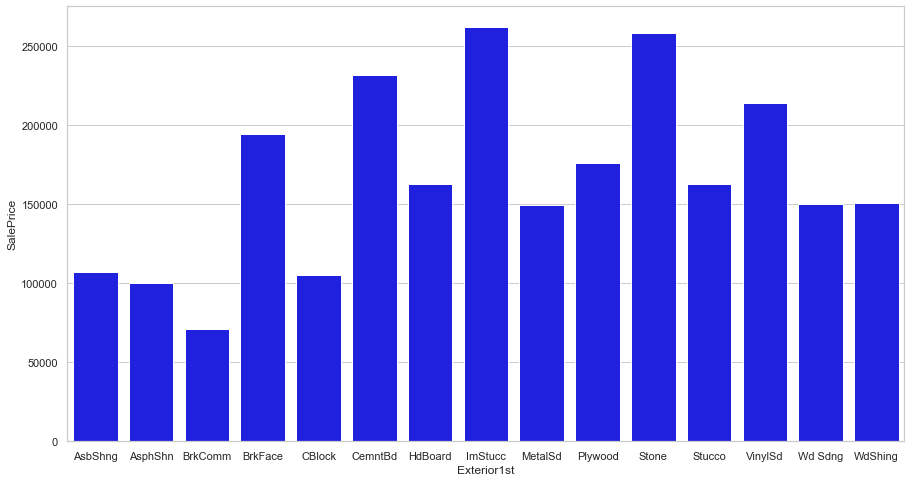

In [631]:
g = sns.barplot(x='Exterior1st',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>

In [632]:
search_desc('Exterior2nd')

There are 1 missing values in Exterior2nd

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles

       AsphShn	Asphalt Shingles

       BrkComm	Brick Common

       BrkFace	Brick Face

       CBlock	Cinder Block

       CemntBd	Cement Board

       HdBoard	Hard Board

       ImStucc	Imitation Stucco

       MetalSd	Metal Siding

       Other	Other

       Plywood	Plywood

       PreCast	PreCast

       Stone	Stone

       Stucco	Stucco

       VinylSd	Vinyl Siding

       Wd Sdng	Wood Siding

       WdShing	Wood Shingles



1 Na. Values are categorical.<br>
will fill the one Na with mode and convert the type to category

In [633]:
housing.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [634]:
housing.Exterior2nd.fillna('VinylSd',inplace=True)

In [635]:
housing['Exterior2nd'] = housing['Exterior2nd'].astype('category')

In [636]:
housing['Exterior2nd'].isna().sum()

0

In [637]:
housing['Exterior2nd'].dtype

CategoricalDtype(categories=['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock',
                  'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other',
                  'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng',
                  'Wd Shng'],
                 ordered=False)

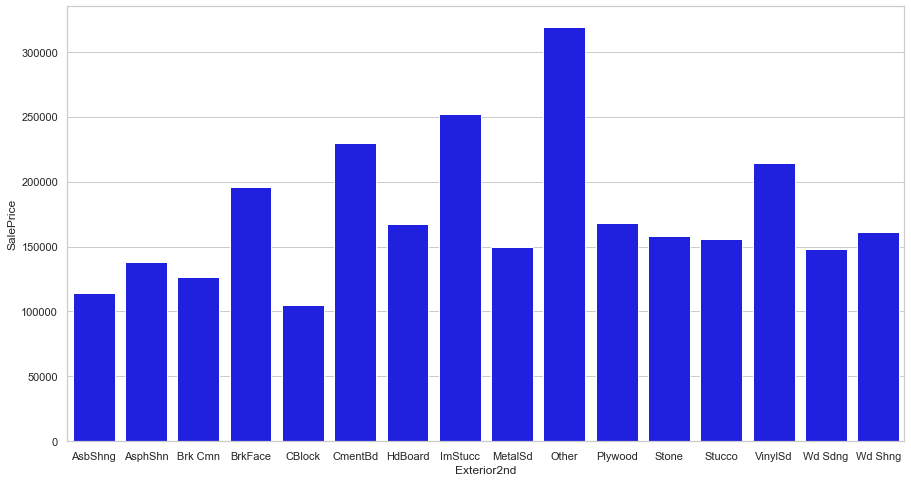

In [638]:
g = sns.barplot(x='Exterior2nd',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>

In [639]:
search_desc('ExterQual')

There are 0 missing values in ExterQual

ExterQual: Evaluates the quality of the material on the exterior 

       Ex	Excellent

       Gd	Good

       TA	Average/Typical

       Fa	Fair

       Po	Poor



No NAs. Can be made ordinal using the qualities dict.

In [640]:
housing['ExterQual'] = housing['ExterQual'].map(qualities)

In [641]:
housing['ExterQual'].value_counts()

3    1798
4     979
5     107
2      35
Name: ExterQual, dtype: int64

In [642]:
housing['ExterQual'].dtype

dtype('int64')

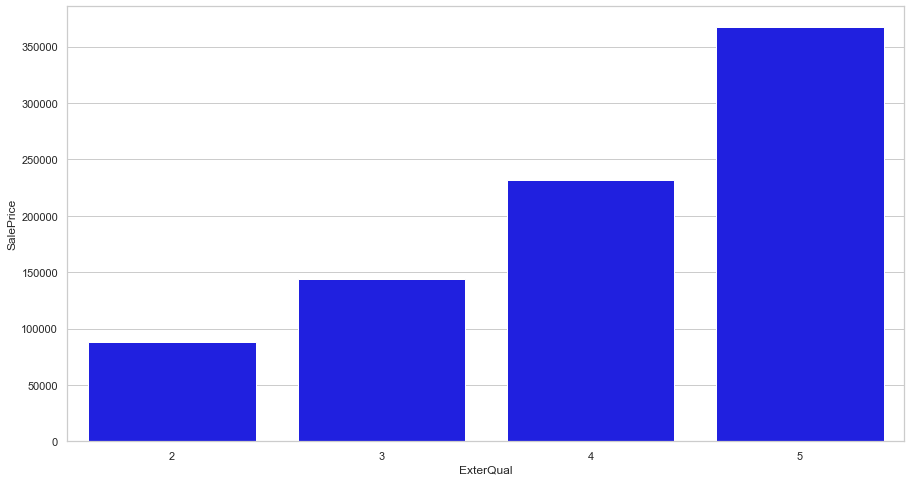

In [643]:
g = sns.barplot(x='ExterQual',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>

In [644]:
search_desc('ExterCond')

There are 0 missing values in ExterCond

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent

       Gd	Good

       TA	Average/Typical

       Fa	Fair

       Po	Poor



No NAs. Can be made ordinal using the qualities dict.

In [645]:
housing['ExterCond'] = housing['ExterCond'].map(qualities)

In [646]:
housing['ExterCond'].value_counts()

3    2538
4     299
2      67
5      12
1       3
Name: ExterCond, dtype: int64

In [647]:
housing['ExterCond'].dtype

dtype('int64')

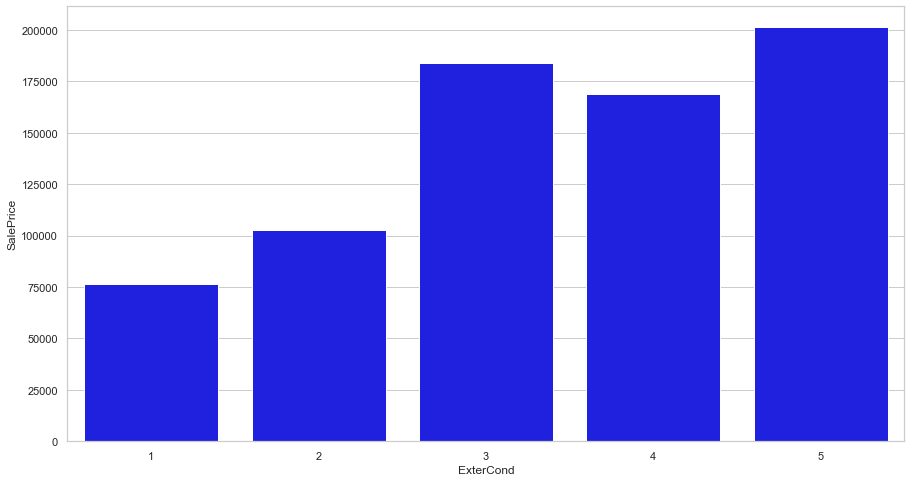

In [648]:
g = sns.barplot(x='ExterCond',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>
15th varible <br>
Electrical

In [649]:
search_desc('Electrical')

There are 1 missing values in Electrical

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex

       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	

       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)

       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)

       Mix	Mixed



1 NA will replace by the mode. convert the type to category.

In [650]:
housing['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [651]:
housing['Electrical'].fillna('SBrkr',inplace=True)

In [652]:
housing['Electrical'] = housing['Electrical'].astype('category')

In [653]:
housing['Electrical'].dtype

CategoricalDtype(categories=['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], ordered=False)

In [654]:
housing['Electrical'].isna().sum()

0

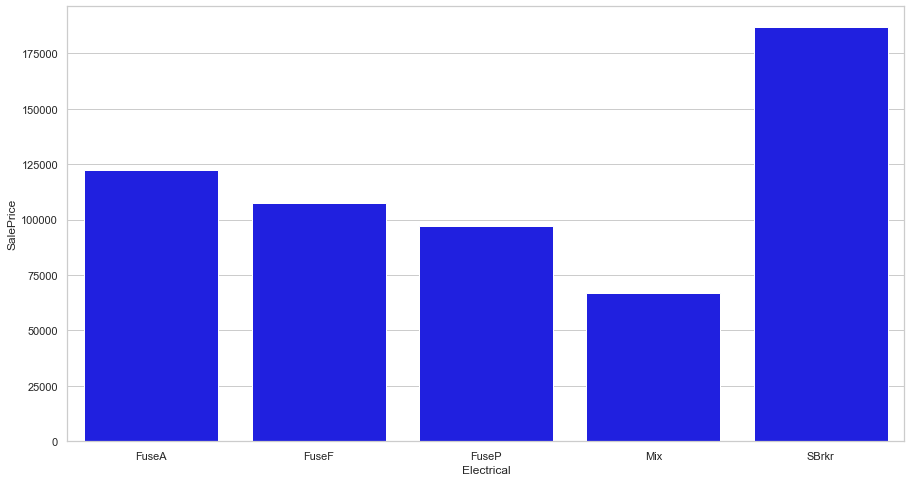

In [655]:
g = sns.barplot(x='Electrical',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>
16th varible <br>
SaleType

In [656]:
search_desc('SaleType')

There are 1 missing values in SaleType

SaleType: Type of sale

       WD 	Warranty Deed - Conventional

       CWD	Warranty Deed - Cash

       VWD	Warranty Deed - VA Loan

       New	Home just constructed and sold

       COD	Court Officer Deed/Estate

       Con	Contract 15% Down payment regular terms

       ConLw	Contract Low Down payment and low interest

       ConLI	Contract Low Interest

       ConLD	Contract Low Down

       Oth	Other



1 NA will replace by the mode. convert the type to category.

In [657]:
housing['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [658]:
housing['SaleType'].fillna('WD',inplace=True)

In [659]:
housing['SaleType'] = housing['SaleType'].astype('category')

In [660]:
housing['SaleType'].isna().sum()

0

In [661]:
housing['SaleType'].dtype

CategoricalDtype(categories=['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth',
                  'WD'],
                 ordered=False)

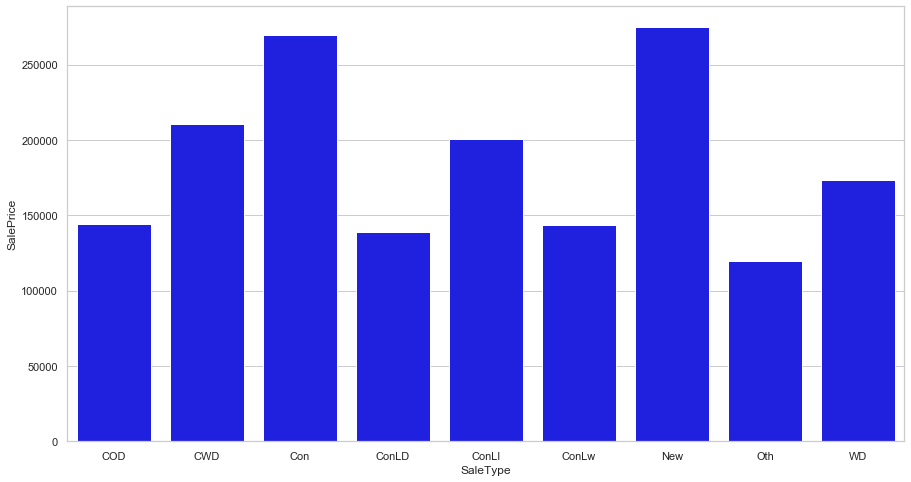

In [662]:
g = sns.barplot(x='SaleType',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>

In [663]:
search_desc('SaleCondition')

There are 0 missing values in SaleCondition

SaleCondition: Condition of sale

       Normal	Normal Sale

       Abnorml	Abnormal Sale -  trade, foreclosure, short sale

       AdjLand	Adjoining Land Purchase

       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	

       Family	Sale between family members

       Partial	Home was not completed when last assessed (associated with New Homes)



In [664]:
housing['SaleCondition'] = housing['SaleCondition'].astype('category')

In [665]:
housing['SaleCondition'].value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [666]:
housing['SaleCondition'].dtype

CategoricalDtype(categories=['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal',
                  'Partial'],
                 ordered=False)

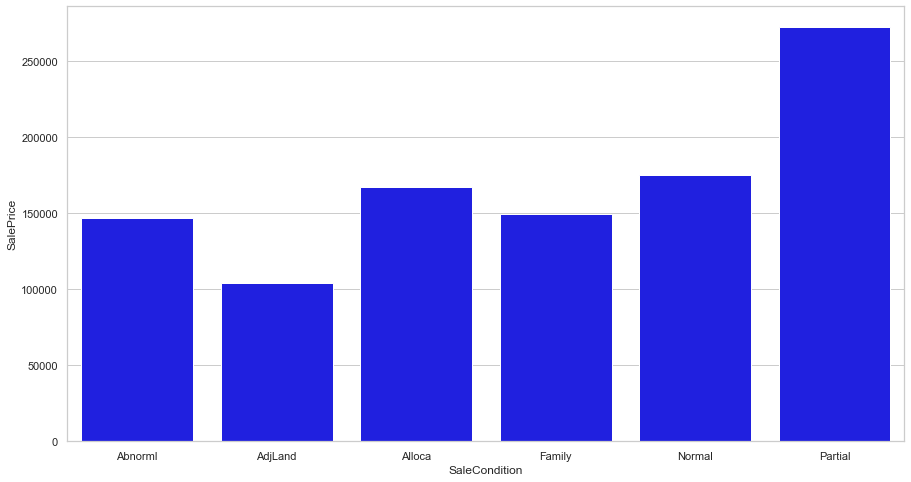

In [667]:
g = sns.barplot(x='SaleCondition',y='SalePrice',data=housing,color='Blue',ci=None)

<hr>
<hr>
<hr>

###### Label encoding/categorization the remaining object variables

In [668]:
housing.select_dtypes(include=['object']).columns.tolist()

['Street',
 'LandContour',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'PavedDrive']

###### Street

In [669]:
search_desc('Street')

There are 0 missing values in Street

Street: Type of road access to property

       Grvl	Gravel	

       Pave	Paved



In [670]:
housing['Street'] = housing['Street'].map({'Grvl':0,'Pave':1})

In [671]:
housing['Street'].value_counts()

1    2907
0      12
Name: Street, dtype: int64

###### LandContour

In [672]:
search_desc('LandContour')

There are 0 missing values in LandContour

LandContour: Flatness of the property

       Lvl	Near Flat/Level	

       Bnk	Banked - Quick and significant rise from street grade to building

       HLS	Hillside - Significant slope from side to side

       Low	Depression



In [673]:
housing['LandContour'] = housing['LandContour'].astype('category')

In [674]:
housing['LandContour'].value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

###### LandSlope

In [675]:
search_desc('LandSlope')

There are 0 missing values in LandSlope

LandSlope: Slope of property

       Gtl	Gentle slope

       Mod	Moderate Slope	

       Sev	Severe Slope



In [676]:
housing['LandSlope'] = housing['LandSlope'].map({'Sev':0, 'Mod':1, 'Gtl':2})

In [677]:
housing['LandSlope'].value_counts()

2    2778
1     125
0      16
Name: LandSlope, dtype: int64

###### Neighborhood

In [678]:
search_desc('Neighborhood')

There are 0 missing values in Neighborhood

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights

       Blueste	Bluestem

       BrDale	Briardale

       BrkSide	Brookside

       ClearCr	Clear Creek

       CollgCr	College Creek

       Crawfor	Crawford

       Edwards	Edwards

       Gilbert	Gilbert

       IDOTRR	Iowa DOT and Rail Road

       MeadowV	Meadow Village

       Mitchel	Mitchell

       Names	North Ames

       NoRidge	Northridge

       NPkVill	Northpark Villa

       NridgHt	Northridge Heights

       NWAmes	Northwest Ames

       OldTown	Old Town

       SWISU	South & West of Iowa State University

       Sawyer	Sawyer

       SawyerW	Sawyer West

       Somerst	Somerset

       StoneBr	Stone Brook

       Timber	Timberland

       Veenker	Veenker



In [679]:
housing['Neighborhood'] = housing['Neighborhood'].astype('category')

###### Condition1

In [680]:
search_desc('Condition1')

There are 0 missing values in Condition1

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street

       Feedr	Adjacent to feeder street	

       Norm	Normal	

       RRNn	Within 200' of North-South Railroad

       RRAn	Adjacent to North-South Railroad

       PosN	Near positive off-site feature--park, greenbelt, etc.

       PosA	Adjacent to postive off-site feature

       RRNe	Within 200' of East-West Railroad

       RRAe	Adjacent to East-West Railroad



In [681]:
housing['Condition1'] = housing['Condition1'].astype('category')

###### Condition2

In [682]:
search_desc('Condition2')

There are 0 missing values in Condition2

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street

       Feedr	Adjacent to feeder street	

       Norm	Normal	

       RRNn	Within 200' of North-South Railroad

       RRAn	Adjacent to North-South Railroad

       PosN	Near positive off-site feature--park, greenbelt, etc.

       PosA	Adjacent to postive off-site feature

       RRNe	Within 200' of East-West Railroad

       RRAe	Adjacent to East-West Railroad



In [683]:
housing['Condition2'] = housing['Condition2'].astype('category')

###### BldgType

In [684]:
search_desc('BldgType')

There are 0 missing values in BldgType

BldgType: Type of dwelling

       1Fam	Single-family Detached	

       2FmCon	Two-family Conversion; originally built as one-family dwelling

       Duplx	Duplex

       TwnhsE	Townhouse End Unit

       TwnhsI	Townhouse Inside Unit



In [685]:
housing['BldgType'] = housing['BldgType'].astype('category')

###### HouseStyle

In [686]:
search_desc('HouseStyle')

There are 0 missing values in HouseStyle

HouseStyle: Style of dwelling

       1Story	One story

       1.5Fin	One and one-half story; 2nd level finished

       1.5Unf	One and one-half story; 2nd level unfinished

       2Story	Two story

       2.5Fin	Two and one-half story; 2nd level finished

       2.5Unf	Two and one-half story; 2nd level unfinished

       SFoyer	Split Foyer

       SLvl	Split Level



In [687]:
housing['HouseStyle'] = housing['HouseStyle'].astype('category')

###### RoofStyle

In [688]:
search_desc('RoofStyle')

There are 0 missing values in RoofStyle

RoofStyle: Type of roof

       Flat	Flat

       Gable	Gable

       Gambrel	Gabrel (Barn)

       Hip	Hip

       Mansard	Mansard

       Shed	Shed



In [689]:
housing['RoofStyle'] = housing['RoofStyle'].astype('category')

###### RoofMatl

In [690]:
search_desc('RoofMatl')

There are 0 missing values in RoofMatl

RoofMatl: Roof material

       ClyTile	Clay or Tile

       CompShg	Standard (Composite) Shingle

       Membran	Membrane

       Metal	Metal

       Roll	Roll

       Tar&Grv	Gravel & Tar

       WdShake	Wood Shakes

       WdShngl	Wood Shingles



In [691]:
housing['RoofMatl'] = housing['RoofMatl'].astype('category')

###### Foundation

In [692]:
search_desc('Foundation')

There are 0 missing values in Foundation

Foundation: Type of foundation

       BrkTil	Brick & Tile

       CBlock	Cinder Block

       PConc	Poured Contrete	

       Slab	Slab

       Stone	Stone

       Wood	Wood



In [693]:
housing['Foundation'] = housing['Foundation'].astype('category')

###### Heating

In [694]:
search_desc('Heating')

There are 0 missing values in Heating

Heating: Type of heating

       Floor	Floor Furnace

       GasA	Gas forced warm air furnace

       GasW	Gas hot water or steam heat

       Grav	Gravity furnace	

       OthW	Hot water or steam heat other than gas

       Wall	Wall furnace



In [695]:
housing['Heating'] = housing['Heating'].astype('category')

###### HeatingQC

In [696]:
search_desc('HeatingQC')

There are 0 missing values in HeatingQC

HeatingQC: Heating quality and condition

       Ex	Excellent

       Gd	Good

       TA	Average/Typical

       Fa	Fair

       Po	Poor



making the variable ordinal using the qualities dict

In [697]:
housing['HeatingQC'] = housing['HeatingQC'].map(qualities)

In [698]:
housing['HeatingQC'].value_counts()

5    1493
3     857
4     474
2      92
1       3
Name: HeatingQC, dtype: int64

###### CentralAir

In [699]:
search_desc('CentralAir')

There are 0 missing values in CentralAir

CentralAir: Central air conditioning

       N	No

       Y	Yes



In [700]:
housing['CentralAir'] = housing['CentralAir'].map({'N':0,'Y':1})

In [701]:
housing['CentralAir'].value_counts()

1    2723
0     196
Name: CentralAir, dtype: int64

###### PavedDrive

In [702]:
search_desc('PavedDrive')

There are 0 missing values in PavedDrive

PavedDrive: Paved driveway

       Y	Paved 

       P	Partial Pavement

       N	Dirt/Gravel



In [703]:
housing['PavedDrive'] = housing['PavedDrive'].map({'N':0, 'P':1, 'Y':2})

In [704]:
housing['PavedDrive'].value_counts()

2    2641
0     216
1      62
Name: PavedDrive, dtype: int64

<hr>
<hr>
<hr>

In [705]:
housing.isna().sum().sum() - housing.SalePrice.isna().sum()

0

###### At this point, all variables are complete (No NAs), and all object variables are converted into either numeric labels or into category<br>
However, there are 3 variables that are recorded numeric but should actually be categorical.<br>
- YrSold
- MoSold
- MSSubClass

###### Year and Month Sold

While oridinality within YearBuilt (or remodeled) makes sense (old houses are worth less), we are talking about only 5 years of sales. These years also include an economic crisis. For instance: Sale Prices in 2009 (after the collapse) are very likely to be much lower than in 2007. I wil convert YrSold into a cateogry before modeling, but as I need the numeric version of YrSold to create an Age variable, I am not doing that yet.

Month Sold is also an Integer variable. However, December is not “better” than January. Therefore, I will convert MoSold values back into factors.

In [706]:
housing['MoSold'] = housing['MoSold'].astype('category')

###### MSSubClass

In [707]:
search_desc('MSSubClass')

There are 0 missing values in MSSubClass

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



In [708]:
MSSubClassdict = {20:'1 story 1946+', 30:'1 story 1945-',
 40:'1 story unf attic', 45:'1,5 story unf',
 50:'1,5 story fin', 60:'2 story 1946+',
 70:'2 story 1945-', 75:'2,5 story all ages',
 80:'split/multi level', 85:'split foyer',
 90:'duplex all style/age', 120:'1 story PUD 1946+',
 150:'1,5 story PUD all', 160:'2 story PUD 1946+',
 180:'PUD multilevel', 190:'2 family conversion'}

housing['MSSubClass'] = housing['MSSubClass'].map(MSSubClassdict).astype('category')

In [709]:
housing['MSSubClass'].dtype

CategoricalDtype(categories=['1 story 1945-', '1 story 1946+', '1 story PUD 1946+',
                  '1 story unf attic', '1,5 story PUD all', '1,5 story fin',
                  '1,5 story unf', '2 family conversion', '2 story 1945-',
                  '2 story 1946+', '2 story PUD 1946+', '2,5 story all ages',
                  'PUD multilevel', 'duplex all style/age', 'split foyer',
                  'split/multi level'],
                 ordered=False)

We have now finally reached the point where all object variables have been converted into categorical or have been label encoded into numbers. In addition, 2 numeric variables have been converted into categorical, and we deleted one variable (Utilities). As you can see , the number of numerical variables is now 56 (including the target variable), and the remaining 23 variables are categorical.

In [710]:
housing.shape[1]

79

In [711]:
housing.select_dtypes(include=['int','float']).shape[1]

56

In [712]:
housing.select_dtypes(include=['category']).shape[1]

23

#### Correlations again

Below we're checking the correlations again. As you can see, the number of variables with a correlation of at least 0.5 with the SalePrice has increased from 10 to 16.

In [713]:
all_numVar1 = housing.select_dtypes(['int','float']).copy()
cor_all_numVar1 = all_numVar1.corr().abs()
high_corr_index1 = cor_all_numVar1.sort_values(by='SalePrice',ascending=False)[:17].index

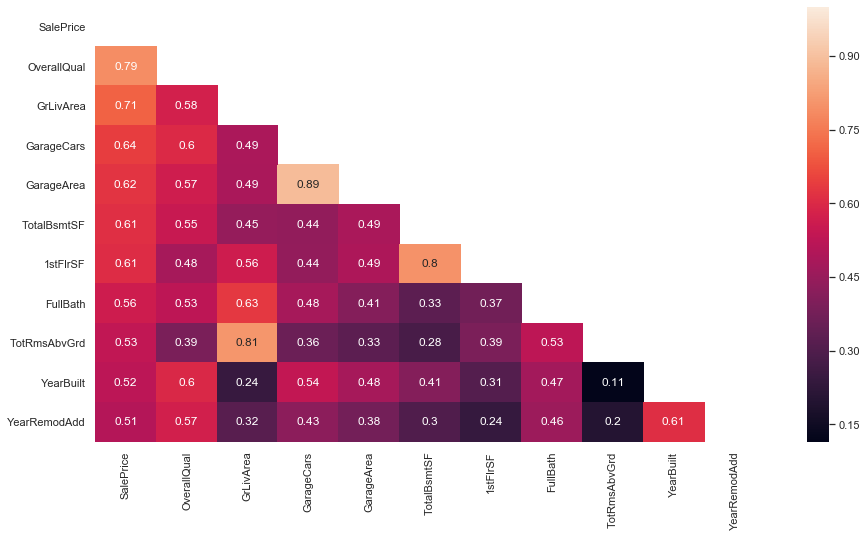

In [714]:
high_corr1 = cor_all_numVar1.loc[high_corr_index,high_corr_index]
mask = np.triu(np.ones(high_corr1.shape))
sns.heatmap(high_corr,annot=True,mask=mask)

###  Feature engineering


###### Total number of Bathrooms

There are 4 bathroom variables. Individually, these variables are not very important. However, we assume that if we add them up into one predictor, this predictor is likely to become a strong one.

In [715]:
housing['TotBathrooms'] = housing.FullBath + (housing.HalfBath*0.5) + housing.BsmtFullBath + (housing.BsmtHalfBath*0.5)

In [716]:
housing['SalePrice'].corr(housing['TotBathrooms'])

0.6317310679319872

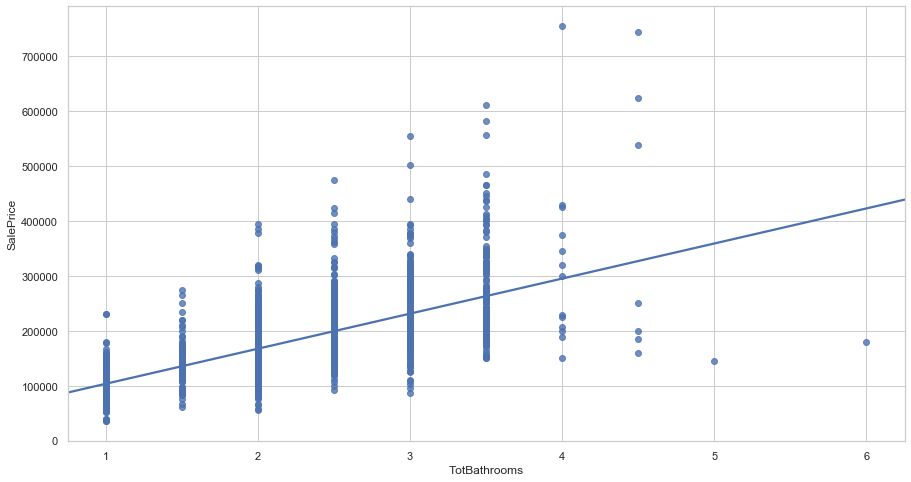

In [717]:
sns.regplot(x='TotBathrooms',y='SalePrice',data=housing,ci=None)

Adding `House Age`, `Remodeled (Yes/No)`, and `IsNew` variables

In [718]:
housing['Remodeled'] = housing.YearBuilt==housing.YearRemodAdd
housing['Remodeled'] = housing['Remodeled'].map({True:0,False:1})

In [719]:
housing['Age'] = housing.YrSold - housing.YearRemodAdd

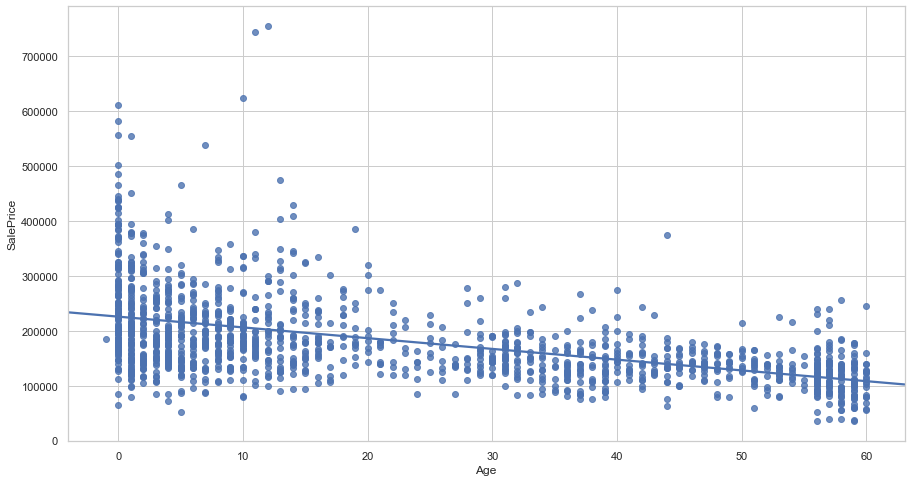

In [720]:
sns.regplot(x='Age',y='SalePrice',data=housing,ci=None)

###### As expected, the graph shows a negative correlation with Age (old house are worth less).

In [721]:
housing['SalePrice'].corr(housing['Age'])

-0.5090787380156294

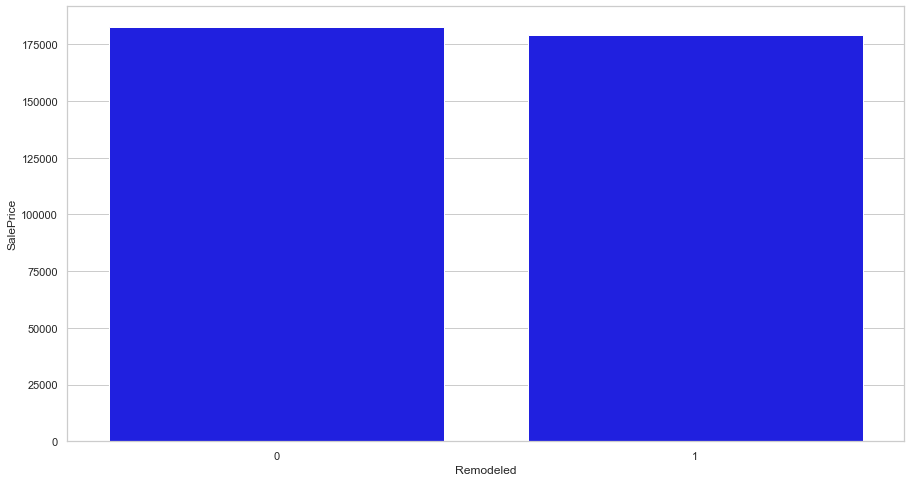

In [722]:
sns.barplot(x='Remodeled',y='SalePrice',data=housing,color='blue',ci=None);

houses that are remodeled are worth less.

In [723]:
housing['SalePrice'].corr(housing['Remodeled'])

-0.02193260005156454

IsNew

In [724]:
housing['Isnew'] = housing.YearBuilt==housing.YrSold
housing['Isnew'] = housing['Isnew'].map({True:1,False:0})

In [725]:
housing['Isnew'].value_counts()

0    2803
1     116
Name: Isnew, dtype: int64

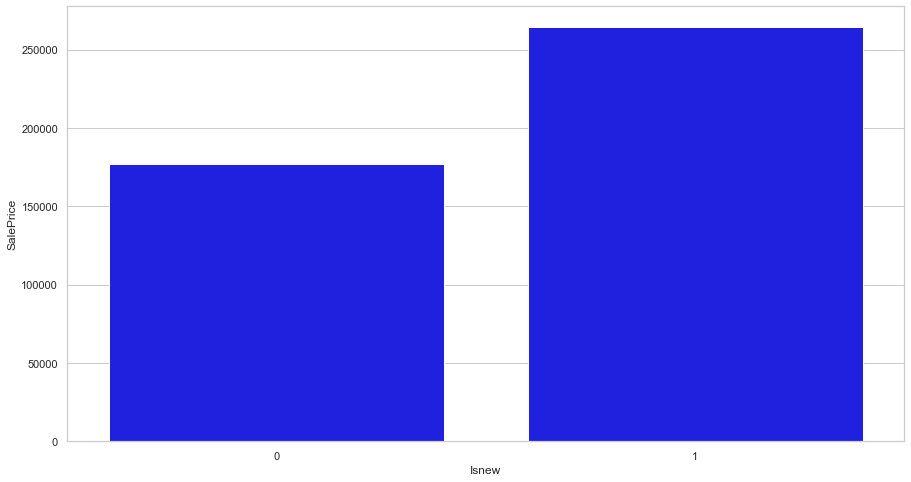

In [726]:
sns.barplot(x='Isnew',y='SalePrice',data=housing,color='blue',ci=None);

#### Binning Neighborhood

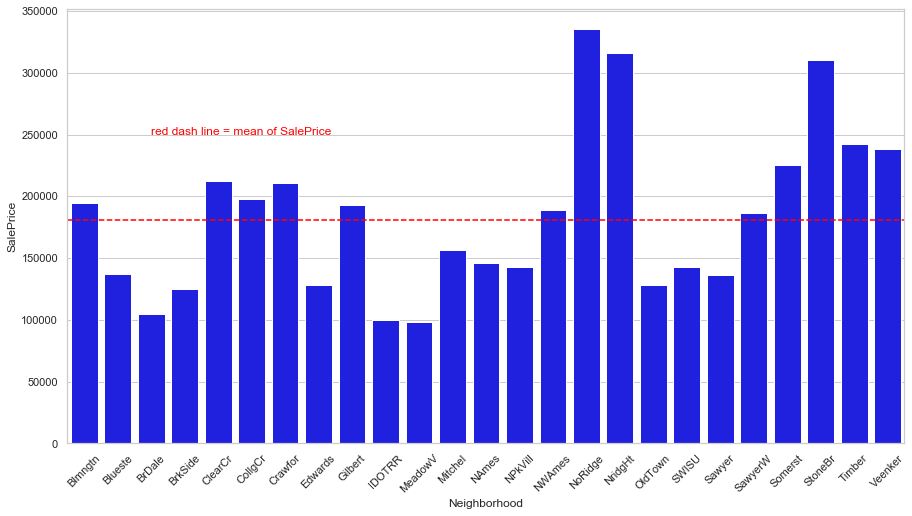

In [727]:
g = sns.barplot(x='Neighborhood',y='SalePrice',data=housing,ci=None,color='blue')
g.axhline(housing.SalePrice.mean(), ls='--',color='red')
loc, labels = plt.xticks()
g.text(2,250000, "red dash line = mean of SalePrice",color='red')
g.set_xticklabels(labels, rotation=45);

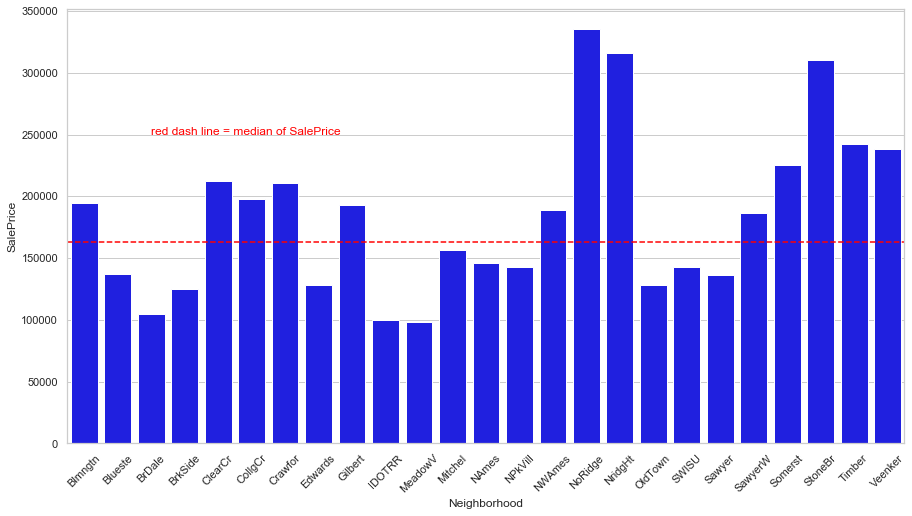

In [728]:
g = sns.barplot(x='Neighborhood',y='SalePrice',data=housing,ci=None,color='blue')
g.axhline(housing.SalePrice.median(), ls='--',color='red')
loc, labels = plt.xticks()
g.text(2,250000, "red dash line = median of SalePrice",color='red')
g.set_xticklabels(labels, rotation=45);

Both the median and mean Saleprices agree on 3 neighborhoods with substantially higher saleprices. The separation of the 3 relatively poor neighborhoods is less clear, but at least both graphs agree on the same 3 poor neighborhoods. Since I do not want to ‘overbin’, I am only creating categories for those ‘extremes’.

In [729]:
def newVar(ele):
    if ele == 'StoneBr' or ele == 'NridgHt' or ele == 'NoRidge':
        return 2
    elif ele == 'MeadowV' or ele == 'IDOTRR' or ele =='BrDale':
        return 0
    else:
        return 1

In [730]:
housing['NeighRich'] = housing['Neighborhood'].apply(newVar)

In [731]:
housing['NeighRich'].value_counts()

1    2471
2     288
0     160
Name: NeighRich, dtype: int64

In [732]:
housing['SalePrice'].corr(housing['NeighRich'])

0.5831388903777076

###### Total Square Feet

As the total living space generally is very important when people buy houses, I am adding a predictors that adds up the living space above and below ground.

In [733]:
housing['TotalSqFeet'] = housing.GrLivArea + housing.TotalBsmtSF

In [734]:
housing['SalePrice'].corr(housing['TotalSqFeet'])

0.7789588289942263

As expected, the correlation with SalePrice is very strong.



Numbers on plot indicate GrLivArea outlier indexes in housing dataframe


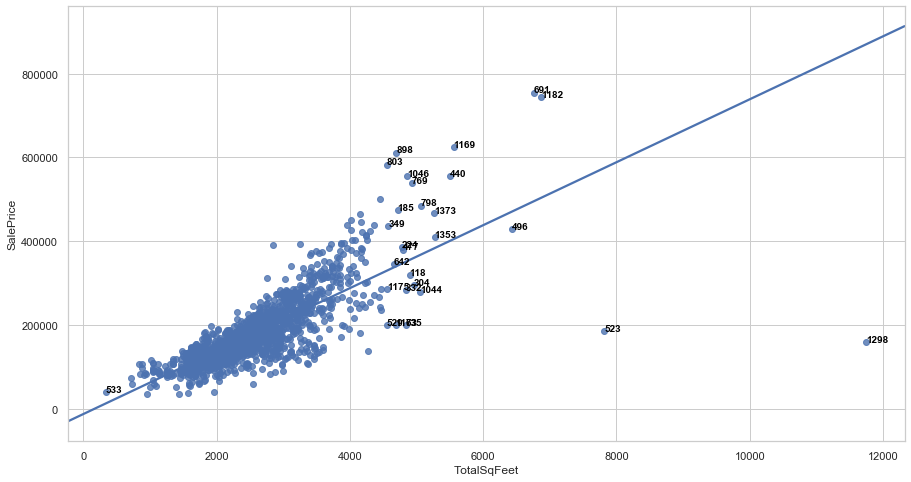

In [735]:
TosqSalePrice = housing[['TotalSqFeet','SalePrice']].dropna()
g = sns.regplot(x='TotalSqFeet',y='SalePrice',data=TosqSalePrice,ci=None)
indexes = outliers_index(TosqSalePrice,'TotalSqFeet')

for index in indexes:
     g.text(TosqSalePrice.TotalSqFeet[index], TosqSalePrice.SalePrice[index], index,
             horizontalalignment='left', size='small', color='black', weight='semibold')
print('\n\nNumbers on plot indicate GrLivArea outlier indexes in housing dataframe')

The two potential outliers seem to ‘outlie’ even more than before. By taking out these two outliers, the correlation increases to 0.829 .

In [736]:
housing[(housing.index != 523) & (housing.index != 1298)][['SalePrice','TotalSqFeet']].corr()

,SalePrice,TotalSqFeet
SalePrice,1.000000,0.829042
TotalSqFeet,0.829042,1.000000


## Preparing data for modeling

###### Dropping highly correlated variables

First of all, we're dropping a variable if two variables are highly correlated. To find these correlated pairs. For instance: GarageCars and GarageArea have a correlation of 0.89. Of those two, we're dropping the variable with the lowest correlation with SalePrice (which is GarageArea with a SalePrice correlation of 0.62. GarageCars has a SalePrice correlation of 0.64).

In [737]:
dropVars = ['YearRemodAdd', 'GarageYrBlt','GarageArea', 'GarageCond', 'TotalBsmtSF','TotRmsAbvGrd', 'BsmtFinSF1']

In [738]:
housing.drop(dropVars,axis=1,inplace=True)

###### Removing outliers

In [739]:
housing.drop(index=[1298,523],inplace=True)

###### create dummy variables and scale

In [740]:
dummy_housing = pd.get_dummies(housing,drop_first=True)

In [741]:
train = dummy_housing.iloc[:1458,:]

In [742]:
test = dummy_housing.iloc[1458:,:]

In [743]:
X = train.drop('SalePrice',axis=1)

In [744]:
y = train['SalePrice']

In [745]:
X_t = test.drop('SalePrice',axis=1)

In [746]:
scaler = StandardScaler()
_x = scaler.fit(X)

In [747]:
X_scaled = pd.DataFrame(_x.transform(X),columns=X.columns)

from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
sns.set(rc={'figure.figsize':(15,8)},style='whitegrid')

In [748]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=98)

In [749]:
lascv = LassoCV(cv=5)

In [750]:
lascv.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [751]:
lascv.alpha_

503.07648910468015

In [752]:
lascv.score(X_train,y_train)

0.9179396895930448

In [753]:
lascv.score(X_test,y_test)

0.9075304637518782

In [754]:
lasso = Lasso(alpha=503)
score = cross_val_score(lasso,X_train,y_train,cv=14).mean()

In [755]:
score

0.8801499925381782

In [756]:
score = cross_val_score(lasso,X_test,y_test,cv=14).mean()

In [757]:
score

0.8844856242488361

In [758]:
lasso.fit(X_train,y_train)

Lasso(alpha=503, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [759]:
lasso.score(X_train,y_train)

0.9179412760860116

In [760]:
lasso.score(X_test,y_test)

0.9075296692633192

In [761]:
scaled_instances = _x.transform(X_t)

In [762]:
pred = lasso.predict(scaled_instances)

In [763]:
pred

array([103481.49713437, 175202.68673891, 173561.92948028, ...,
       171811.94198675, 121886.85085075, 230990.99274106])

In [764]:
test_ids

array([1461, 1462, 1463, ..., 2917, 2918, 2919])

In [765]:
submission = pd.DataFrame({'Id':test_ids, 'SalePrice':pred})

In [766]:
submission.head()

,Id,SalePrice
0,1461,103481.497134
1,1462,175202.686739
2,1463,173561.929480
3,1464,191232.788710
4,1465,216621.830871


In [767]:
submission.shape

(1459, 2)

In [768]:
submission.to_csv('submission.csv',index=False)

In [769]:


pred_vars = [v for v in X_train if v != 'SalePrice']
target_var = 'SalePrice'

# X = X_train
# y = y_train

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = RandomForestRegressor(n_estimators=100, random_state=101,max_features=6)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

In [770]:
model.score(X_train,y_train)

0.977193462389605

In [771]:
model.score(X_test,y_test)

0.8715324622919394

In [772]:
scaled_instances1 = _x.transform(X_t)

In [773]:
y_pred = model.predict(scaled_instances1)

In [774]:
submx = pd.DataFrame({'Id':test_ids, 'SalePrice':y_pred})

In [775]:
submx.head()

,Id,SalePrice
0,1461,130475.69
1,1462,155962.93
2,1463,184729.05
3,1464,194864.54
4,1465,198089.47


In [776]:
submx.to_csv('submx.csv',index=False)

# Conclusion

our goal was to pridect the prices for House Prices dataset and we tryed to use diffrent models to see which model can preduce a better prediction, and we found that random forest model will give us a score of 0.162, which is the best score we got.